<a href="https://colab.research.google.com/github/nekovin/QuantumBalatro/blob/main/43025_Assignment_3_Group_3_Quantum_Balatro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**⚛️ Quantum Balatro 🃏**

<img src="https://i.imgur.com/rZ5SLKA.png" alt="Quantum Balatro Game Cover" height="400" />

<br/>

⚜️ **Group:** 3

⚜️ **Group Members:**
- Abishek Sundar Raman (14097226) - abishek.sundarraman@student.uts.edu.au
- Benedict Poon (24554091) - benedict.poon@student.uts.edu.au
- Calvin Leighton (14176972) - calvin.d.leighton@student.uts.edu.au
- Duc Anh Tran (25090085) - ducanh.tran@student.uts.edu.au
- Joshua Tan (14506240) - joshua.j.tan@student.uts.edu.au
- Sibishan Ravindran (14543324) - sibishan.ravindran@student.uts.edu.au


---
<br/>

Welcome to **Quantum Balatro**.

## 🚧 **Development Environment Setup**
⬇️ Click on the little run button (▶️) to install & import the required python packages...
---

In [ ]:
!pip install qiskit pylatexenc matplotlib requests numpy git+https://github.com/mkrphys/ipython-tikzmagic.git --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
# core functions
import numpy as np
import random
import json

#  displaying quantum & game UI in colab
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import qiskit
from qiskit import QuantumCircuit
import ipywidgets as widgets
from google.colab import output
import matplotlib.pyplot as plt
import pylatexenc

# sending quokka requests
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

---

## 🃏 **Classical Balatro: The Game Before It Got Quantum**

In ancient Rome, Balatro meant Joker.

Best Debut Indie Game, Best Independent Game, and Best Mobile Game at The 2024 Game Awards.

<img src="https://assetsio.gnwcdn.com/balatro1080-(1).png?width=1600&height=900&fit=crop&quality=100&format=png&enable=upscale&auto=webp" alt="Quantum Balatro Game Cover" height="300" />

### 🧩 Classical Gameplay Overview

The game follows a simplified version of the original *Balatro* mechanics:

- **Hand of cards** are drawn from a shuffled deck.
- You may **apply Jokers** to enhance your hand.
- You receive **points based on the best poker hand** formed.
- Higher difficulty increases the **score multiplier** and lowers resources.

<br/>


### ❌ What We Didn't Include (Compared to the Original Balatro)

| Missing Mechanic         | What It Is | Why We Omitted It |
|--------------------------|------------|--------------------|
| 💰 **Economy System**     | Chips, betting, and purchasing power | Would distract from quantum learning objective |
| 🔁 **Ante Progression**   | Increasing challenge per round | Fixed level cap (4 rounds) keeps game finite |
| 🛍️ **Shop Mechanic**      | Buying new Jokers between rounds | No persistent progression implemented |
| 🧩 **Deck Building**       | Customizable deck over time | Hands are generated randomly each round |
| 🎴 **Consumables**         | Vouchers, tarot cards, etc. | Simplified for core mechanic focus |
| ♻️ **Roguelike Loop**     | Game continues until failure | Ends after 4 rounds to demonstrate concepts |

<br/>

### 🎓 Why This Design?

Our simplified **Quantum Balatro** focuses on educational value:
- Emphasizes **hand evaluation** and **Joker mechanics**
- Adds **quantum computing principles** learnt in this subject.
- Provides a clean, testable structure suitable for demonstrating quantum logic

This lets us explore how **quantum effects can change deterministic game mechanics**, while still keeping the game accessible and contained.

<br/>

---

> ⚠️ Note: This project is not a clone of the full *Balatro* game. Instead, it's an **educational remix** for demonstrating quantum magic 🧙‍♂️ through gameplay.

---

## 🧱 Deck & Card Construction

Before we dive into the scoring or quantum mechanics, we define the two foundational data structures for our game: the `Card` and the `StandardDeck`.

<br/>

### ✦ Mathematical Model
#### 🂠 Card Definition
Let:

- $( \mathcal{S} = \{\heartsuit, \diamondsuit, \clubsuit, \spadesuit\} )$: the set of suits  
- $( \mathcal{V}_{\text{str}} = \{2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K, A\} )$: display values  
- $( \mathcal{V}_{\text{num}} = \{2, 3, \dots, 14\} )$: numeric values, where:
  - $( J = 11 )$
  - $( Q = 12 )$
  - $( K = 13 )$
  - $( A = 14 )$

Then a card $( c \in \mathcal{C} )$ is formally defined as:

$$
c = (\text{name}, \text{display_name}, s, v) \quad \text{where } s \in \mathcal{S},\ v \in \mathcal{V}_{\text{num}}
$$

Each card object thus represents a tuple of:

- `name`: Full string name (e.g., `"Queen of Hearts"`)  
- `display_name`: Render-friendly name (can be identical to `name`)  
- `suit`: One of the elements from $( \mathcal{S} )$  
- `value`: An integer in $( \mathcal{V}_{\text{num}} )$

<br/>

#### 🂠 Total Cards in Deck

Since there are $( 4 )$ suits and $( 13 )$ values:

$$
|\mathcal{C}| = |\mathcal{S}| \times |\mathcal{V}_{\text{str}}| = 4 \times 13 = 52
$$

Which matches a standard Western 52-card deck.

<br/>

#### 🔀 Shuffle Permutations

Let the deck be a list of $( n = 52 )$ unique cards. The total number of possible deck permutations is:

$$
|\text{Deck Orderings}| = 52!
$$

Each permutation is equally likely under an ideal unbiased shuffle, i.e.,

$$
\mathbb{P}(\text{any specific ordering}) = \frac{1}{52!}
$$

<br/>

#### 🂡 Draw Logic

Let $( n )$ be the number of cards drawn so far. After each draw:

$$
|\text{Deck}| = 52 - n
$$

Where:

- $( n \in \{0, 1, \dots, 52\} )$
- The domain of possible draws is reduced by 1 with each draw.

This ensures no duplicate draws and preserves the unique-card constraint of a standard deck.

<br/>


In [ ]:
class Card:

  # constructor
  def __init__(self, name, display_name, suit, value):
    self.name = name
    self.display_name = display_name
    self.suit = suit
    self.value = value

  # returns a dictionary representation of the card
  def get_dict(self):
    return {
      "name": self.name,
      "display_name": self.display_name,
      "suit": self.suit,
      "value": self.value
    }

class StandardDeck:
  # constructor
  def __init__(self):
    self.cards = []
    self.build()
    self.shuffle()
    self.suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    self.values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    self.value_dict = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 11, 'Q': 12, 'K': 13, 'A': 14}
    self.reverse_value_dict = {v: k for k, v in self.value_dict.items()}

  def build(self):
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    value_dict = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 11, 'Q': 12, 'K': 13, 'A': 14}

    for suit in suits:
      for value in values:
        name = f"{value} of {suit}"
        display_name = f"{value} of {suit}"
        numeric_value = value_dict[value]
        self.cards.append(Card(name, display_name, suit, numeric_value))

  # shuffles the deck randomly using the Fisher-Yates algorithm
  def shuffle(self):
    random.shuffle(self.cards)

  # draws the top card from the deck
  def draw(self):
    if len(self.cards) > 0:
        return self.cards.pop()
    return None

---
## 👤 The Player Class

The `Player` class tracks the current game state for a user during gameplay. This includes:

- Current hand
- Score and multiplier
- Jokers in possession
- Game level and progression
- Deck connection
- Hand history logging

<br/>

### 🔢 Key Variables (with Mathematical Meaning)

Let a player be represented as:

$$
P = (\text{name}, \text{score}, \text{multiplier}, \text{hand}, \text{jokers}, \text{level})
$$

Where:

- $( \text{name} \in \mathbb{S} )$: player identifier (string)
- $( \text{score} \in \mathbb{N}_0 )$: current score, initialized at 0
- $( \text{multiplier} \in \mathbb{R}^+ )$: score multiplier, defaults to 1
- $( \text{hand} = \{c_1, c_2, \dots, c_k\} \subseteq \mathcal{C} )$: set of drawn cards
- $( \text{jokers} = \{j_1, j_2, \dots\} )$: set of applied modifiers
- $( \text{hand_size} = k )$: number of cards drawn per round (default 5)
- $( \text{deck} \sim \text{StandardDeck} )$: attached deck object
- $( \text{level} \in \mathbb{N} )$: current game round

<br/>

### 🧮 Score Computation

The score is updated via:

$$
\text{score} \leftarrow \text{score} + (\text{base_points} \times \text{multiplier})
$$

Given a base hand value $( s \in \mathbb{N} )$ and multiplier $( m )$, the updated score is:

$$
\text{score}_{\text{new}} = \text{score}_{\text{old}} + s \cdot m
$$

<br/>

### 🃏 Jokers

- Jokers are stored in a list:  
  $$
  \text{jokers} = \{j \in \mathcal{J} : \text{name}(j) \in \mathbb{S}\}
  $$

- The player can:
  - Add a joker
  - Remove a joker by name
  - Check if a joker exists
  - Retrieve a joker object

<br/>

### ✍️ Hand History

After each round, the current hand is recorded with metadata:

$$
H = (\text{hand}, \text{type}, \text{score}, \text{description})
$$

This is stored in a list of past hands, used for logging and review.

<br/>

### 🧾 Game State Snapshot

The full player state is summarized via:

$$
\text{GameState} = \{\text{name}, \text{score}, \text{multiplier}, \text{hand}, \text{jokers}, \text{level}, \text{hand_history}, \text{entangled_cards}\}
$$


In [ ]:
class Player:

  # constructor
  def __init__(self, name, debug=False):
    self.name = name
    self.score = 0
    self.multiplier = 1
    self.hand = []
    self.jokers = []
    self.deck = None
    self.level = 1
    self.hand_history = []
    self.entangled_cards = []  # list of tuples storing indices of entangled cards, now redundent
    self.hand_size = 5
    self.debug = debug

  # adds a single card to the player's hand
  def add_card(self, card):
    self.hand.append(card)

  # adds a joker to the player's current joker list
  def add_joker(self, joker):
    self.jokers.append(joker)

  # removes a joker by name if it exists. Returns True if successful, False otherwise
  def remove_joker(self, joker_name):
    for i, joker in enumerate(self.jokers):
      if joker.name == joker_name:
        self.jokers.pop(i)
        return True
    return False

  # checks if a joker with the given name exists
  def has_joker(self, joker_name):
    return any(joker.name == joker_name for joker in self.jokers)

  # returns a joker object by name, or None if not found
  def get_joker(self, joker_name):
    for joker in self.jokers:
      if joker.name == joker_name:
        return joker
    return None

  # clears the current hand
  def reset_hand(self):
    self.hand = []

  # draws a hand of cards corresponding `hand_size`
  def draw_hand(self, hand_size):
    for _ in range(hand_size):
      self.add_card(self.deck.draw())

  # updates score based on base points & current multiplier and returns the total points added
  def add_score(self, points):
    self.score += points * self.multiplier
    return points * self.multiplier

  # records the current hand's metadata
  def record_hand(self, hand_type, score, description):
    self.hand_history.append({
      "hand": [card.get_dict() for card in self.hand],
      "type": hand_type,
      "score": score,
      "description": description
    })

  # returns a dictionary of the current player state
  def get_game_state(self):
    return {
      "name": self.name,
      "score": self.score,
      "multiplier": self.multiplier,
      "chips": self.chips,
      "hand": [card.get_dict() for card in self.hand],
      "jokers": [joker.get_dict() if hasattr(joker, 'get_dict') else joker for joker in self.jokers],
      "level": self.level,
      "hand_history": self.hand_history,
      "entangled_cards": self.entangled_cards
    }

---
## 🛠️ Helper Functions

These are utility functions used to set up the game and evaluate poker hands during each round.

<br/>

### 🃏 `draw_initial_jokers(player, num_jokers, look_under_the_hood)`

This function randomly assigns quantum jokers to the player. Each joker is drawn from the set:

$$
\mathcal{J} = \{\text{Superposition}, \text{Entanglement}, \text{Hamiltonian}, \text{Oracle}, \text{Arithmetic}, \text{Grover's}\}
$$

For each $( i = 1 )$ to $( n = \text{num_jokers} )$:

$$
j_i \sim \text{Uniform}(\mathcal{J})
\quad \Rightarrow \quad \text{player.jokers.append}(j_i)
$$

<br/>

### 🎮 `initialise_game(difficulty, look_under_the_hood)`

This function configures a new `Player` object and prepares the game state. Specifically:

- Initializes a new deck:
  $$
  \text{player.deck} \leftarrow \text{StandardDeck()}
  $$
- Applies difficulty settings:
  $$
  (\text{hand_size}, \text{num_jokers}, \text{multiplier}) = \text{set_difficulty}(d)
  $$
- Attaches quantum joker collapse functions:
  $$
  \text{player.collapse_X} \leftarrow \text{collapse_X.__get__()}
  \quad \text{for X in } \{\text{Superposition, Entanglement, Oracle, Hamiltonian, Arithmetic, Grover}\}
  $$

Finally, it draws jokers for the player:
$$
\text{draw_initial_jokers}(player, \text{num_jokers}, \text{debug})
$$

Returns the `player` object with full configuration.

<br/>

### 🧠 `evaluate_hand(hand)`

This function determines the **best scoring hand** from a set of cards. Given:
- $( \mathcal{H} = \{c_1, c_2, \dots, c_k\} )$ is the hand
- Let $( v_i = \text{value}(c_i) )$ and $( s_i = \text{suit}(c_i) )$

It computes:

- **Flush**:  
  $$
  \text{is_flush} = \left( \left| \{s_i\} \right| = 1 \right)
  $$

- **Straight**:  
  $$
  \text{is_straight} = \left( \max(v_i) - \min(v_i) = 4 \land |\{v_i\}| = 5 \right)
  $$

- **Value Count Distribution**:  
  Let $( f(x) = \text{count of value } x \in \{v_1, \dots, v_k\} )$

Based on the frequency map $( f )$, hands are scored as follows:

| Hand Type                          | Score Formula                          |
|-----------------------------------|----------------------------------------|
| Five of a Kind                    | $( 9500 + v )$                          |
| Straight Flush                    | $( 9000 + \max(v_i) )$                  |
| Four of a Kind + Pair (Quantum)   | $( 8500 + v_4 \cdot 10 + v_2 )$       |
| Four of a Kind                    | $( 8000 + v_4 )$                        |
| Double Three of a Kind (Quantum)  | $( 7800 + \max(v_3) \cdot 10 + \min(v_3) )$ |
| Three of a Kind + Two Pair        | $( 7500 + v_3 \cdot 100 + v_2a \cdot 10 + v_2b )$ |
| Full House                        | $( 7000 + v_3 )$                        |
| Flush                             | $( 6000 + \max(v_i) )$                  |
| Straight                          | $( 5000 + \max(v_i) )$                  |
| Three of a Kind                   | $( 4000 + v_3 )$                        |
| Three Pair (Quantum)              | $( 3500 + a \cdot 100 + b \cdot 10 + c )$ |
| Two Pair                          | $( 3000 + \max(v_2) \cdot 100 + \min(v_2) )$ |
| Pair                              | $( 2000 + v_2 )$                        |
| High Card                         | $( 1000 + \max(v_i) )$                  |

Each hand returns a tuple:

$$
(\text{name}, \text{score}, \text{description})
$$


In [ ]:
# randomly assigns a specified number of quantum jokers to the player
def draw_initial_jokers(player, num_jokers, look_under_the_hood):
  joker_types = [SuperpositionJoker, EntanglementJoker, HamiltonianJoker, OracleJoker, GroversJoker, QuantumArithmeticJoker]
  for _ in range(num_jokers):
    joker = random.choice(joker_types)
    joker_class = random.choice(joker_types)
    random.seed()
    joker = joker_class(debug=look_under_the_hood)
    player.add_joker(joker)

# initializes a new player and game state based on difficulty and settings
def initalise_game(difficulty, look_under_the_hood):
  player = Player("Gambling Addict")
  player.deck = StandardDeck()
  player.deck.shuffle()

  hand_size, num_jokers, multiplier = set_difficulty(difficulty)
  player.multiplier = multiplier
  player.hand_size = hand_size
  player.draw_hand(hand_size)
  player.debug = look_under_the_hood

  # attach bound methods for quantum operations
  player.collapse_superposition = collapse_superposition.__get__(player, player.__class__)
  player.collapse_entanglement = collapse_entanglement.__get__(player, player.__class__)
  player.collapse_hamiltonian = collapse_hamiltonian.__get__(player, player.__class__)
  player.collapse_deutsch_jozsa = collapse_deutsch_jozsa.__get__(player, player.__class__)
  player.collapse_grover = collapse_grover.__get__(player, player.__class__)
  #player.collapse_clasiq = collapse_clasiq.__get__(player, player.__class__)
  player.collapse_arithmetic = collapse_arithmetic.__get__(player, player.__class__)
  player.get_original_bits = get_original_bits.__get__(player, player.__class__)

  draw_initial_jokers(player, num_jokers, look_under_the_hood)
  return player

def evaluate_hand(hand):

  values = [card.value for card in hand]
  suits = [card.suit for card in hand]

  value_counts = {}
  for value in values:
    if value in value_counts:
      value_counts[value] += 1
    else:
      value_counts[value] = 1

  is_flush = len(set(suits)) == 1

  print(values)

  sorted_values = sorted(set(values))
  is_straight = len(sorted_values) == 5 and sorted_values[-1] - sorted_values[0] == 4

  if 5 in value_counts.values():
    five_value = [v for v, count in value_counts.items() if count == 5][0]
    return ("Five of a Kind", 9500 + five_value, "Five of a Kind!")

  if is_straight and is_flush:
    return ("Straight Flush", 9000 + max(values), "Straight Flush!")

  # four of a kind with pair (quantum hand)
  if 4 in value_counts.values() and 2 in value_counts.values():
    four_value = [v for v, count in value_counts.items() if count == 4][0]
    pair_value = [v for v, count in value_counts.items() if count == 2][0]
    return ("Four of a Kind with Pair", 8500 + four_value * 10 + pair_value, "Four of a Kind with Pair!!")

  if 4 in value_counts.values():
    value = [v for v, count in value_counts.items() if count == 4][0]
    return ("Four of a Kind", 8000 + value, "Four of a Kind!")

  # double three of a kind (quantum hand)
  if list(value_counts.values()).count(3) == 2:
    threes = [v for v, count in value_counts.items() if count == 3]
    return ("Double Three of a Kind", 7800 + max(threes) * 10 + min(threes), "Double Three of a Kind!")

  # three of a kind with two pair (quantum hand)
  if 3 in value_counts.values() and list(value_counts.values()).count(2) >= 2:
    three_value = [v for v, count in value_counts.items() if count == 3][0]
    pairs = [v for v, count in value_counts.items() if count == 2]
    pairs_sorted = sorted(pairs, reverse=True)
    return ("Three of a Kind with Two Pair", 7500 + three_value * 100 + pairs_sorted[0] * 10 + pairs_sorted[1], "Three of a Kind with Two Pair!")

  if 3 in value_counts.values() and 2 in value_counts.values():
    three_value = [v for v, count in value_counts.items() if count == 3][0]
    return ("Full House", 7000 + three_value, "Full House!")

  if is_flush:
    return ("Flush", 6000 + max(values), "Flush!")

  if is_straight:
    return ("Straight", 5000 + max(values), "Straight!")

  if 3 in value_counts.values():
    value = [v for v, count in value_counts.items() if count == 3][0]
    return ("Three of a Kind", 4000 + value, "Three of a Kind!")

  # three Pair (quantum hand)
  if list(value_counts.values()).count(2) == 3:
    pairs = [v for v, count in value_counts.items() if count == 2]
    pairs_sorted = sorted(pairs, reverse=True)
    return ("Three Pair", 3500 + pairs_sorted[0] * 100 + pairs_sorted[1] * 10 + pairs_sorted[2], "Three Pair!")

  if list(value_counts.values()).count(2) == 2:
    pairs = [v for v, count in value_counts.items() if count == 2]
    return ("Two Pair", 3000 + max(pairs) * 100 + min(pairs), "Two Pair!")

  if 2 in value_counts.values():
    value = [v for v, count in value_counts.items() if count == 2][0]
    return ("Pair", 2000 + value, "Pair!")

  return ("High Card", 1000 + max(values), "High Card")

---
## 🔁 Game Loop Function — UI , Logic & Main Game Driver

This section defines the main event loop for Quantum Balatro. It controls:
- UI rendering
- Button interactions
- Joker logic
- Quantum measurements
- Level progression and scoring

<br/>

### 🎮 `play_game(difficulty, look_under_the_hood)`

This is the main entry point to start the game. It:

1. Calls `initialise_game(...)` to create a `Player` object:
   $$
   P = \texttt{initialise_game}(d, \text{debug})
   $$
2. Displays the current game state and assigns UI buttons
3. Sets up event handlers for each action (submit hand, apply jokers, measure)

<br/>

### 🧠 Quantum Card Collapse Logic

During submission:

- For each card $( c_i \in \text{hand} )$, check its `quantum_state`
- If $( \text{quantum_state}(c_i) \in \{\text{Superposition, Entangled, Oracle, Hamiltonian, Arithmetic, Grover's}\} )$, collapse it:
  $$
  \texttt{collapse_X}(c_i) \quad \text{where } X \text{ matches the joker type}
  $$

Then:
- Evaluate the hand via `evaluate_hand(hand)`
- Add the resulting score:  
  $$
  \text{score}_{\text{new}} = \text{score}_{\text{old}} + s \cdot m
  $$
- Record hand type and advance level

<br/>

### 🧪 `measure_all_quantum_cards(player)`

This helper scans all cards $( c_i \in \text{hand} )$ and collapses any quantum card. It supports:

$$
\text{quantum_state}(c_i) \in \{\text{Superposition}, \text{Entangled},\text{Oracle}, \text{Hamiltonian}, \text{Arithmetic}, \text{Grover's}\}
$$

Each collapsed card is counted, and the total is printed.

<br/>

### 🎭 Joker Button Handlers

Each Joker has its own UI handler:

- **Superposition Joker**: Applies superposition to a selected card  
- **Entanglement Joker**: Entangles the chosen card   
- **Oracle Joker**: Simulates the Deutsch–Jozsa oracle function
- **Hamiltonian Joker**: Applies a Hamiltonian transformation
- **Arithmetic Joker**: Performs quantum arithmetic on the selected card
- **Grover Joker**: Amplifies the desired outcome using Grover’s search   


Once used:
$$
\texttt{player.remove_joker}(j.\text{name})
$$

<br/>

### 📈 `set_difficulty(difficulty)`

Returns tuple \( (h, j, m) \) where:
- $( h )$: hand size
- $( j )$: number of jokers
- $( m )$: multiplier

| Difficulty          | Hand Size $( h )$ | Jokers $( j )$ | Multiplier $( m )$ |
|---------------------|------------------|----------------|---------------------|
| easy                | 9                | 8              | 1                   |
| medium              | 7                | 5              | 1.5                 |
| hard                | 5                | 3              | 2                   |
| gambler             | 5                | 1              | 3                   |
| quantum gambling    | 5                | 8              | 1                   |
| custom              | 0                | 0              | 1                   |

<br/>

### 🏁 `display_game_completion(player)`

If $( \texttt{player.level} \geq 4 )$, displays end-of-game message with final score.

- If score $( \geq 10,000 )$: 🏆🏆🏆
- If score $( \geq 5,000)$: 🏆🏆
- If score $( \geq 1,000 )$: 🏆
- Else: 🎮 Game Complete!

<br/>

### 📺 `display_game_state(player, difficulty)`

Prints the current UI state including:

- **Header**:  
  $$
  \text{Score: } S \quad | \quad \text{Multiplier: } m \times \quad | \quad \text{Level: } L
  $$
- **Hand Display**:
  - Shows each card’s `display_name`
  - If quantum, adds tag (e.g., “Quantum Card (Entangled)”)
- **Jokers**: Lists remaining jokers in possession

<br/>

### 🎴 `format_card(card)`

Converts a card object to a readable string:

- Quantum cards are labeled:
  $$
  \texttt{Quantum Card (Superposition/Entangled/Oracle/Hamiltonian/Arithmetic/Grover's)}
  $$
- Otherwise uses `card.display_name`


In [ ]:
# main game entry point: sets up game state and initializes UI logic
def play_game(difficulty, look_under_the_hood):
  player = initalise_game(difficulty, look_under_the_hood)

  # displays the current game state and attaches all button handlers
  def show_game_state():
    if not look_under_the_hood:
      clear_output(wait=True)
    display_game_state(player, difficulty)

    if player.level >= 4:
      if not look_under_the_hood:
        clear_output()
      display_game_completion(player, look_under_the_hood)
      return

    # Create different layouts for different types of buttons
    main_btn_layout = widgets.Layout(width='250px', height='60px', margin='8px')
    joker_btn_layout = widgets.Layout(width='220px', height='50px', margin='6px')
    util_btn_layout = widgets.Layout(width='250px', height='50px', margin='8px')

    # Main action button
    btn_submit = widgets.Button(description='Submit Hand', layout=main_btn_layout, button_style='success')

    # Joker buttons
    btn_superposition = widgets.Button(description='Use Superposition Joker', layout=joker_btn_layout, button_style='info',
                                      disabled=not player.has_joker("Superposition Joker"))
    btn_entanglement = widgets.Button(description='Use Entanglement Joker', layout=joker_btn_layout, button_style='info',
                                    disabled=not player.has_joker("Entanglement Joker"))
    btn_hamiltonian = widgets.Button(description='Use Hamiltonian Joker', layout=joker_btn_layout, button_style='info',
                                    disabled=not player.has_joker("Hamiltonian Joker"))
    btn_oracle = widgets.Button(description='Use Oracle Joker', layout=joker_btn_layout, button_style='info',
                              disabled=not player.has_joker("Oracle Joker"))
    btn_grover = widgets.Button(description='Use Grover Joker', layout=joker_btn_layout, button_style='info',
                              disabled=not player.has_joker("Grover Joker"))
    btn_arithmetic = widgets.Button(description='Use Arithmetic Joker', layout=joker_btn_layout, button_style='info',
                                  disabled=not player.has_joker("Arithmetic Joker"))

    # Utility button
    has_quantum_cards = any(getattr(card, "quantum_state", None) in ["superposition", "entangled", "hamiltonian", "deutsch-jozsa", "grover", "arithmetic"] for card in player.hand)
    btn_measure_all = widgets.Button(description='Measure All Quantum Cards', layout=util_btn_layout,
                                    button_style='warning', disabled=not has_quantum_cards)

    # Display in a better organized layout
    display(btn_submit)
    display(widgets.HTML("<p style='margin: 5px 0; font-weight: bold;'>Quantum Jokers:</p>"))
    display(widgets.HBox([btn_superposition, btn_entanglement, btn_hamiltonian]))
    display(widgets.HBox([btn_oracle, btn_grover, btn_arithmetic]))
    display(widgets.HTML("<p style='margin: 10px 0 5px 0;'></p>"))  # Spacer
    display(btn_measure_all)

    # handles "Submit Hand" click: collapses quantum cards, scores hand, advances level
    def on_submit_clicked(b):
      for card_idx, card in enumerate(player.hand):

        if getattr(card, "quantum_state", None) == "superposition":
          print("You have a quantum card in your hand! Collapsing...")
          player.collapse_superposition(card_idx)

        if getattr(card, "quantum_state", None) == "entangled":
          print("You have a quantum card in your hand! Collapsing...")
          player.collapse_entanglement(card_idx)

        # Add this check for Oracle/deutsch-jozsa cards
        if getattr(card, "quantum_state", None) == "deutsch-jozsa":
          print("You have a quantum card in your hand! Collapsing...")
          player.collapse_deutsch_jozsa(card_idx)

        if getattr(card, "quantum_state", None) == "hamiltonian":
          print("You have a quantum card in your hand! Collapsing...")
          player.collapse_hamiltonian(card_idx)

        if getattr(card, "quantum_state", None) == "grover":
          print("You have a quantum card in your hand! Collapsing...")
          player.collapse_grover(card_idx)

        if getattr(card, "quantum_state", None) == "arithmetic":
          print("You have a quantum card in your hand! Collapsing...")
          player.collapse_arithmetic(card_idx)

      hand_type, score, description = evaluate_hand(player.hand)
      player.add_score(score)
      player.record_hand(hand_type, score, description)
      print("===HAND====\n")
      print(f"{hand_type}")
      print("===========\n")
      player.level += 1
      player.reset_hand()
      player.draw_hand(player.hand_size)
      show_game_state()

    # handles "Superposition Joker": allows user to select and apply superposition to a card
    def on_superposition_clicked(b):
      if not look_under_the_hood:
        clear_output(wait=True)
      print("Select a card to apply Superposition Joker:")
      display_game_state(player, difficulty)

      btn_layout = widgets.Layout(width='200px', height='40px', margin='5px')

      card_buttons = []
      for i in range(len(player.hand)):
        btn = widgets.Button(description=f"Card {i+1}", layout=btn_layout)
        card_buttons.append(btn)

      btn_back = widgets.Button(description="Back", layout=btn_layout, button_style='danger')

      display(widgets.HBox(card_buttons))
      display(btn_back)

      def on_card_selected(b):
        card_idx = int(b.description.split()[-1]) - 1
        joker = player.get_joker("Superposition Joker")
        joker.apply(player, card_idx)
        player.remove_joker("Superposition Joker")
        show_game_state()

      def on_back_clicked(b):
        show_game_state()

      for btn in card_buttons:
        btn.on_click(on_card_selected)
      btn_back.on_click(on_back_clicked)

    # helper to collapse all quantum cards in hand and count them
    def measure_all_quantum_cards(player):

      measured_count = 0

      for card_idx, card in enumerate(player.hand):
        if getattr(card, "quantum_state", None) == "superposition":
          player.collapse_superposition(card_idx)
          measured_count += 1
        elif getattr(card, "quantum_state", None) == "entangled":
          player.collapse_entanglement(card_idx)
          measured_count += 1
        elif getattr(card, "quantum_state", None) == "hamiltonian":
          print("Collapsing Hamiltonian")
          player.collapse_hamiltonian(card_idx)
          measured_count += 1
        elif getattr(card, "quantum_state", None) == "deutsch-jozsa":
          player.collapse_deutsch_jozsa(card_idx)
          measured_count += 1
        elif getattr(card, "quantum_state", None) == "grover":
          player.collapse_grover(card_idx)
          measured_count += 1
        elif getattr(card, "quantum_state", None) == "arithmetic":
          player.collapse_arithmetic(card_idx)
          measured_count += 1

      return measured_count

    def on_entanglement_clicked(b):
      if not look_under_the_hood:
          clear_output(wait=True)
      print("Select card to entangle:")
      display_game_state(player, difficulty)

      btn_layout = widgets.Layout(width='200px', height='40px', margin='5px')

      card_buttons = []
      for i in range(len(player.hand)):
        btn = widgets.Button(description=f"Card {i+1}", layout=btn_layout)
        card_buttons.append(btn)

      btn_back = widgets.Button(description="Back", layout=btn_layout, button_style='danger')

      display(widgets.HBox(card_buttons))
      display(btn_back)

      def on_card_selected(b):
        card_idx = int(b.description.split()[-1]) - 1
        joker = player.get_joker("Entanglement Joker")
        joker.apply(player, card_idx)
        player.remove_joker("Entanglement Joker")
        show_game_state()

      def on_back_clicked(b):
        show_game_state()

      for btn in card_buttons:
        btn.on_click(on_card_selected)
      btn_back.on_click(on_back_clicked)

    # handles "Hamiltonian Joker": applies Hamiltonian operation to selected card
    def on_hamiltonian_clicked(b):
      if not look_under_the_hood:
          clear_output(wait=True)
      print("Select card to apply hamiltonin joker")
      display_game_state(player, difficulty)

      btn_layout = widgets.Layout(width='200px', height='40px', margin='5px')

      card_buttons = []
      for i in range(len(player.hand)):
        btn = widgets.Button(description=f"Card {i+1}", layout=btn_layout)
        card_buttons.append(btn)

      btn_back = widgets.Button(description="Back", layout=btn_layout, button_style='danger')

      display(widgets.HBox(card_buttons))
      display(btn_back)

      def on_card_selected(b):
        card_idx = int(b.description.split()[-1]) - 1
        joker = player.get_joker("Hamiltonian Joker")
        joker.apply(player, card_idx)
        player.remove_joker("Hamiltonian Joker")
        show_game_state()

      def on_back_clicked(b):
        show_game_state()

      for btn in card_buttons:
        btn.on_click(on_card_selected)
      btn_back.on_click(on_back_clicked)


    # handles "Oracle Joker": simulates the Deutsch-Jozsa algorithm on selected card
    def on_oracle_clicked(b):
      if not look_under_the_hood:
          clear_output(wait=True)
      print("Select card to apply Oracle Joker:")
      display_game_state(player, difficulty)

      btn_layout = widgets.Layout(width='200px', height='40px', margin='5px')

      card_buttons = []
      for i in range(len(player.hand)):
        btn = widgets.Button(description=f"Card {i+1}", layout=btn_layout)
        card_buttons.append(btn)

      btn_back = widgets.Button(description="Back", layout=btn_layout, button_style='danger')

      display(widgets.HBox(card_buttons))
      display(btn_back)

      def on_card_selected(b):
        card_idx = int(b.description.split()[-1]) - 1
        joker = player.get_joker("Oracle Joker")
        joker.apply(player, card_idx)
        player.remove_joker("Oracle Joker")
        show_game_state()

      def on_back_clicked(b):
        show_game_state()

      for btn in card_buttons:
        btn.on_click(on_card_selected)
      btn_back.on_click(on_back_clicked)

    def on_grover_clicked(b):
      if not look_under_the_hood:
          clear_output(wait=True)
      print("Select card to apply Grover Joker:")
      display_game_state(player, difficulty)

      btn_layout = widgets.Layout(width='200px', height='40px', margin='5px')

      card_buttons = []
      for i in range(len(player.hand)):
        btn = widgets.Button(description=f"Card {i+1}", layout=btn_layout)
        card_buttons.append(btn)

      btn_back = widgets.Button(description="Back", layout=btn_layout, button_style='danger')

      display(widgets.HBox(card_buttons))
      display(btn_back)

      def on_card_selected(b):
        card_idx = int(b.description.split()[-1]) - 1
        joker = player.get_joker("Grover Joker")
        joker.apply(player, card_idx)
        player.remove_joker("Grover Joker")
        show_game_state()

      def on_back_clicked(b):
        show_game_state()

      for btn in card_buttons:
        btn.on_click(on_card_selected)
      btn_back.on_click(on_back_clicked)

    def on_measure_all_clicked(b):
      num_measured = measure_all_quantum_cards(player)
      print(f"Measured {num_measured} quantum cards!")
      show_game_state()


    ####

    def on_clasiq_clicked(b):
      if not look_under_the_hood:
          clear_output(wait=True)
      print("Select card to apply Clasiq Joker:")
      display_game_state(player, difficulty)

      btn_layout = widgets.Layout(width='200px', height='40px', margin='5px')

      card_buttons = []
      for i in range(len(player.hand)):
        btn = widgets.Button(description=f"Card {i+1}", layout=btn_layout)
        card_buttons.append(btn)

      btn_back = widgets.Button(description="Back", layout=btn_layout, button_style='danger')

      display(widgets.HBox(card_buttons))
      display(btn_back)

      def on_card_selected(b):
        card_idx = int(b.description.split()[-1]) - 1
        joker = player.get_joker("Clasiq Joker")
        joker.apply(player, card_idx)
        player.remove_joker("Clasiq Joker")
        show_game_state()

      def on_back_clicked(b):
        show_game_state()

      for btn in card_buttons:
        btn.on_click(on_card_selected)
      btn_back.on_click(on_back_clicked)

    def on_measure_all_clicked(b):
      num_measured = measure_all_quantum_cards(player)
      print(f"Measured {num_measured} quantum cards!")
      show_game_state()

  ###

    def on_arithmetic_clicked(b):
        if not look_under_the_hood:
            clear_output(wait=True)
        print("Select card to apply Clasiq Joker:")
        display_game_state(player, difficulty)

        btn_layout = widgets.Layout(width='200px', height='40px', margin='5px')

        card_buttons = []
        for i in range(len(player.hand)):
          btn = widgets.Button(description=f"Card {i+1}", layout=btn_layout)
          card_buttons.append(btn)

        btn_back = widgets.Button(description="Back", layout=btn_layout, button_style='danger')

        display(widgets.HBox(card_buttons))
        display(btn_back)

        def on_card_selected(b):
          card_idx = int(b.description.split()[-1]) - 1
          joker = player.get_joker("Arithmetic Joker")
          joker.apply(player, card_idx)
          player.remove_joker("Arithmetic Joker")
          show_game_state()

        def on_back_clicked(b):
          show_game_state()

        for btn in card_buttons:
          btn.on_click(on_card_selected)
        btn_back.on_click(on_back_clicked)

    def on_measure_all_clicked(b):
      num_measured = measure_all_quantum_cards(player)
      print(f"Measured {num_measured} quantum cards!")
      show_game_state()


    ###

    btn_submit.on_click(on_submit_clicked)
    btn_superposition.on_click(on_superposition_clicked)
    btn_entanglement.on_click(on_entanglement_clicked)
    btn_hamiltonian.on_click(on_hamiltonian_clicked)
    btn_grover.on_click(on_grover_clicked)
    btn_oracle.on_click(on_oracle_clicked)
    #btn_clasiq.on_click(on_clasiq_clicked)
    btn_arithmetic.on_click(on_arithmetic_clicked)
    btn_measure_all.on_click(on_measure_all_clicked)

  # starts the UI rendering and input loop
  show_game_state()

In [ ]:
# configures game parameters based on difficulty level
def set_difficulty(difficulty):
  if difficulty == "easy":
    hand_size = 9
    num_jokers = 8
    multiplier = 1
  elif difficulty == "medium":
    hand_size = 7
    num_jokers = 5
    multiplier = 1.5
  elif difficulty == "hard":
    hand_size = 5
    num_jokers = 3
    multiplier = 2
  elif difficulty == "gambler":
    hand_size = 5
    num_jokers = 1
    multiplier = 3
  elif difficulty == "quantum gambling":
    hand_size = 5
    num_jokers = 8
    multiplier = 1
  elif difficulty == "custom":
    hand_size = 0
    num_jokers = 0
    multiplier = 1
  return hand_size, num_jokers, multiplier

In [ ]:
# displays end-of-game message and final score based on player performance
def display_game_completion(player, look_under_the_hood=False): # made wit ai needs to change
  if player.level >= 4:
    if not look_under_the_hood:
        clear_output()

    victory_banner = """
    ╔═════════════════════════════════════════╗
    ║                                         ║
    ║             CONGRATULATIONS!            ║
    ║         YOU COMPLETED THE GAME!         ║
    ║                                         ║
    ╚═════════════════════════════════════════╝
    """

    score_display = f"Final Score: {player.score}"

    print(victory_banner)
    print(score_display)

    if player.score >= 10000:
      print("\n🏆🏆🏆")
    elif player.score >= 5000:
      print("\n🏆🏆")
    elif player.score >= 1000:
      print("\n🏆")
    else:
      print("\n🎮 Game Complete!")

    return True
  return False

# re-renders game state and triggers completion check if level cap reached
def show_game_state():
    if not look_under_the_hood:
      clear_output(wait=True)
    display_game_state(player, difficulty)

    if player.level >= 4:
      if not look_under_the_hood:
        clear_output()
      display_game_completion(player, look_under_the_hood)
      return

# prints current hand, score, jokers, and last round's result (if any)
def display_game_state(player, difficulty):

  #output.clear() # https://stackoverflow.com/questions/75667127/why-is-my-input-box-not-showing-in-google-colab

  print("=== QUANTUM BALATRO ===")
  print(f"Score: {player.score} | Multiplier: {player.multiplier}x | Level: {player.level} | Difficulty: {difficulty}")
  if len(player.hand_history) > 0:
    print(f"Scored hand {player.hand_history[-1]['type']}")
  print("\n🃏 YOUR HAND 🃏")
  print("═══════════════")
  for i, card in enumerate(player.hand):
    card_display = format_card(card)
    if not type(card) == QuantumCard:
      binary_val = player.get_original_bits(original_card=card)
      print(f"  {i+1}. {card_display} | Binary: {binary_val}")
    else:
      print(f"  {i+1}. {card_display}")

  print("\n" + "─" * 30)

  print("\n🎭 YOUR JOKERS 🎭")
  print("═══════════════════")
  if player.jokers:
    for i, joker in enumerate(player.jokers):
        print(f"  {i+1}. {joker.display_name}")
  else:
    print("  No jokers!")

# returns a readable label for classical and quantum cards based on card type/state
def format_card(card):
    if hasattr(card, 'quantum_state') and card.quantum_state == "superposition":
      return "Quantum Card (Superposition)"
    elif hasattr(card, 'quantum_state') and card.quantum_state == "entangled":
      return "Quantum Card (Entangled)"
    elif hasattr(card, 'quantum_state') and card.quantum_state == "hamiltonian":
      return "Quantum Card (hamiltonian)"
    elif hasattr(card, 'quantum_state') and card.quantum_state == "deutsch-jozsa":
      return "Quantum Card (Oracle)"
    elif hasattr(card, 'quantum_state') and card.quantum_state == "grover":
      return "Quantum Card (Grover)"
    elif hasattr(card, 'quantum_state') and card.quantum_state == "arithmetic":
      return "Quantum Card (arithmetic)"
    elif hasattr(card, 'display_name'):
      return card.display_name
    elif isinstance(card, dict) and 'display_name' in card:
      return card['display_name']
    else:
      return str(card)

---

## **🚀 Making it Quantum**

## 🃏 Quantum Joker Cards

Quantum Jokers apply specific quantum operations to cards in your hand. Each Joker encodes quantum logic (via QASM) and changes the classical value of a card into a probabilistic or algorithmically determined quantum state.

<br/>

### ⚛️ Superposition Joker

**Effect:** Applies superposition to any one card.  
**Operation:** Uses Hadamard gates $( H $) to place all 6 bits of the card into an equal superposition:

$$
H^{\otimes 6} \cdot \lvert x \rangle \quad \Rightarrow \quad \frac{1}{\sqrt{2^6}} \sum_{i=0}^{63} \lvert i \rangle
$$

This causes the card to represent all possible 6-bit values simultaneously, collapsing only when measured.

<br/>

### 🔗 Entanglement Joker

**Effect:** Entangles two qubits within the card’s binary string.  
**Operation:** Applies a CNOT gate between two qubits $( q_i, q_j )$, such that:

$$
\text{Entangle}(q_i, q_j): \quad \lvert \psi \rangle = \frac{1}{\sqrt{2}}(\lvert 00 \rangle + \lvert 11 \rangle)
$$

When measured, these qubits collapse together. With insight into bitstring structure, this can be used to bias the collapse toward higher-value cards.

<br/>

### 🧠 Oracle Joker (Deutsch-Jozsa)

**Effect:** Simulates a simplified Deutsch-Jozsa algorithm using the card's bits to influence the oracle.  
**Operations:**

- Input qubits $( q_0 \ldots q_5 )$, output qubit $( q_6 )$
- Applies Hadamards $( H^{\otimes 6} )$
- A **balanced oracle** is applied via two $( \text{CNOT} )$ gates using controls from the card's bits
- Final Hadamards and measurement yield deterministic collapse based on oracle classification

$$
f(x) = \begin{cases}
\text{constant} & \text{if output is always 0 or 1} \\
\text{balanced} & \text{if output is 0 for half of inputs, 1 for other half}
\end{cases}
$$

This algorithm alters the outcome distribution in a unique way depending on the original card input.

<br/>

### 🧲 Hamiltonian Joker

**Effect:** Evolves the card’s quantum state under a simplified 2-qubit Hamiltonian.

**Operations:**
- Applies Hadamards to create initial superposition  
- Pairs of qubits undergo interaction steps using:  
  - Controlled rotations $( R_z(2at), R_z(2bt) )$  
  - CNOT gates to simulate entanglement dynamics  
- Parameters: $( a = 0.7 )$, $( b = 0.1 )$, $( t = 1.4 )$

$$
\hat{H} = aX \otimes Z + bI \otimes Z, \quad \text{applied as } e^{-i\hat{H}t}
$$

This structured evolution manipulates probability amplitudes and entangles pairs of qubits.

<br/>

### ➕ Arithmetic Joker

**Effect:** Performs a quantum **half-adder** operation on a card’s first two qubits, storing the result (sum and carry) in the next two qubits. The final two qubits are placed into superposition to inject probabilistic behavior.

**Operations:**

Let the qubits be $( (q_0, q_1, q_2, q_3, q_4, q_5) )$, representing a 6-bit card. The logic is:

- **Carry Calculation**:
  $$ q_2 \leftarrow q_0 \cdot q_1 $$
  Implemented via a Toffoli gate: $( \text{CCX}(q_0, q_1, q_2) )$

- **Sum Calculation**:
  $$ q_3 \leftarrow q_0 \oplus q_1 $$
  Using two CNOTs: $( \text{CX}(q_0, q_3) )$ and $( \text{CX}(q_1, q_3) )$

- **Superposition Injection**:
  $$ H(q_4), \quad H(q_5) $$
  Applies Hadamards to final qubits, producing:
  $$
  \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \quad \text{or} \quad \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
  $$

This combination introduces deterministic logic and controlled randomness — ideal for controlled modifications while preserving uncertainty.

<br/>

### 🔍 Grover's Joker

**Effect:** Applies **Grover's quantum search algorithm** to amplify the probability of redrawing a card with its original value.

**Operations:**

- **Initialization**:  
  Apply Hadamards to create uniform superposition:
  $$
  |\psi_0\rangle = \frac{1}{\sqrt{2^6}} \sum_{x=0}^{63} |x\rangle
  $$

- **Oracle Marking**:  
  Negates the amplitude of the original bitstring (e.g., `|101100⟩`) using:
  - \( X \) gates on qubits with value 0
  - Multi-controlled-Z (via `MCXGate`)
  - Reversal of \( X \) gates

- **Diffusion Operator**:  
  Reflects all amplitudes about the average:
  $$
  D = 2|\psi_0\rangle\langle\psi_0| - I
  $$
  Implemented via:
  - Hadamards and \( X \) on all qubits
  - Another multi-controlled-Z
  - Undo Hadamards and \( X \)

- **Iterations**:
  Optimal iteration count:
  $$
  \left\lfloor \frac{\pi}{4} \sqrt{2^6} \right\rfloor = 5
  $$

- **Measurement**:
  Final state is measured, collapsing to the most likely amplified value — typically the original card.

This could help the player **re-invoke strong cards** with high probability. It's ideal for locking in good hands while introducing minimal randomness.

<br/>


---

### 📟 Quantum Hardware (🦫 Quokka Quantum Simulator)

To bring the Quantum Balatro to life, this game uses a **quantum circuits** to generate randomness and simulate quantum behavior. Specifically, we use the **Quokka Quantum Simulator**, which allows us to construct and execute real quantum circuits without needing access to a physical quantum computer.

<img src="https://media.licdn.com/dms/image/v2/D5612AQHfmJEv8hrX3g/article-cover_image-shrink_423_752/article-cover_image-shrink_423_752/0/1724314009212?e=1748476800&v=beta&t=--yBh1kC6r3Y-AabTm7AFt5YK_3h396X-L3q0N99Oc0" alt="quokka" />

In [ ]:
def send_to_quokka(program=None, count=1, my_quokka='quokka1'): # quokka_node is a keyword argument with a default value of quokka1
  if my_quokka:
    print(f"Sending to {my_quokka}!")

    # Step 1: Define the server address
    request_http = f'http://{my_quokka}.quokkacomputing.com/qsim/qasm'

    if program is None:
        raise Exception("No program provided")

    # Step 2: Prepare the data to send
    data = {
        'script': program,
        'count': count
    }

    try:
      # Step 3: Send the POST request
      result = requests.post(request_http, json=data, verify=False)

      # Step 4: Convert the response to a Python dictionary
      json_obj = json.loads(result.content)

      # Return the result
      return json_obj['result']['c']
    except Exception as e:
      print(f"Error communicating with Quokka: {e}")
      import random
      raise Exception(f"Quokka communication failed {e}")
  else:
    raise "Failed to fetch quokka"

#### 🧪 Quokka Tester Function
Run this code cell to check which Quokka machines are online

In [ ]:
def send_to_quokka_baseline(program, quokka_node='quokka1'):  # quokka_node is a keyword argument with a default value of quokka1
    # Step 1: Define the server address
    request_http = 'http://{}.quokkacomputing.com/qsim/qasm'.format(quokka_node)

    # Step 2: Prepare the data to send
    data = {
        'script': program,
        'count': 1
    }

    # Step 3: Send the POST request
    result = requests.post(request_http, json=data, verify=False)

    # Step 4: Convert the response to a Python dictionary
    json_obj = json.loads(result.content)

    # Return the result
    return json_obj['result']['c']

def test_quokka_nodes():
    working_quokkas = []

    # A simple quantum coin flip: puts qubit in superposition and measures it (0 or 1).
    test_program = """
    OPENQASM 2.0;
    include "qelib1.inc";

    qreg q[1];
    creg c[1];

    h q[0];
    measure q[0] -> c[0];
    """

    # Quick test all Quokka nodes (1 to 6) and logging the responsive ones.
    print("🔍 Testing Quokka nodes...\n")
    for i in range(1, 7):
        node = f"quokka{i}"
        try:
            result = send_to_quokka_baseline(test_program, node)
            if result:
                print(f"✅ {node} is responding — result: {result}")
                working_quokkas.append(node)
            else:
                print(f"⚠️  {node} responded but no result.")
        except Exception as e:
            print(f"❌ {node} failed — {str(e)}")

    print("\n✅ Working Quokkas:", working_quokkas)

test_quokka_nodes()

🔍 Testing Quokka nodes...

✅ quokka1 is responding — result: [[1]]
✅ quokka2 is responding — result: [[1]]
❌ quokka3 failed — Expecting value: line 1 column 1 (char 0)
✅ quokka4 is responding — result: [[0]]
✅ quokka5 is responding — result: [[1]]
✅ quokka6 is responding — result: [[1]]

✅ Working Quokkas: ['quokka1', 'quokka2', 'quokka4', 'quokka5', 'quokka6']


---
## 🧠 Quantum Information Fundamentals

### 🔹 Qubits and Superposition

Where a normal (classical) bit is written as a **0 OR 1**, a **superposition** is where a qubit can be both 0's and 1's.

Any qubit that isn't purely one or the other is in a superposition:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

When you measure this, it will then *collapse* to either 1 or 0, which is how we and classical computing interpret qubits!

<br/>

### 🏗️ Gates

There are a few gates that need to be known for this project:

1. **Hadamard Gate**:  
   $$
   H = \frac{1}{\sqrt{2}}
   \begin{pmatrix}
   1 & 1 \\
   1 & -1
   \end{pmatrix}
   $$

   This is the key gate! It transforms a qubit from a definite state $( |0\rangle )$ or $( |1\rangle )$ into an equal probability of measuring either 0 or 1. I.e., superposition!

2. **X Gate (NOT Gate)**:  
   $$
   X =
   \begin{pmatrix}
   0 & 1 \\
   1 & 0
   \end{pmatrix}
   $$

   This flips the quantum state. It allows us to properly initialise cards by flipping qubits from 0 to 1 or vice versa.

3. **CNOT (Controlled-NOT) Gate**:  
   The CNOT gate is a two-qubit gate represented by the matrix:
   $$
   \text{CNOT} =
   \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0
   \end{pmatrix}
   $$
   This gate flips the state of the target qubit *if and only if* the control qubit is in state $( |1\rangle )$.
4. **RZ Gate (Rotation around Z-axis)**:

  The RZ gate rotates a qubit around the Z-axis of the Bloch sphere by an angle $( \theta )$:

  $$
  R_z(\theta) =
  \begin{pmatrix}
  1 & 0 \\
  0 & e^{i\theta}
  \end{pmatrix}
  $$

  This gate applies a phase shift to the \( |1\rangle \) component of a qubit. It's useful in simulating Hamiltonian evolution or tuning interference patterns.

<br/>

---

## 🃏 Qubits to Cards

As quantum systems scale, classical simulation becomes increasingly difficult due to exponential growth:

For a system with $( n )$ qubits:

- State vectors require $( 2^n )$ complex numbers  
- Quantum gates are represented by $( 2^n \times 2^n )$ matrices  
- Computational resources grow exponentially  
- Visualisation becomes infeasible beyond a few qubits

A general controlled operation can be written as:

$$
(I - |111 \dots\rangle \langle 111 \dots|) \otimes I + |111 \dots\rangle \langle 111 \dots| \otimes U
$$

Even 6-qubit quantum states are powerful enough to demonstrate meaningful quantum effects, while still being practical to simulate on classical hardware.

<br/>

### 📍 Mapping Cards to Qubits

Now that we understand how quantum bits behave, how do we relate them to playing cards?

A standard deck has **52 cards** (13 values × 4 suits). While we could represent Aces and 2s as $(|0\rangle)$ and $(|1\rangle)$, we need a broader encoding. So instead, we map each 6-bit quantum outcome (from $(0)$ to $(63)$) onto a card using modulo arithmetic.

<br/>

#### 🧠 Encoding Strategy

Let:

- $( b \in \{0,1\}^6 )$ be a 6-bit binary string  
- $( \text{index} = \text{int}(b, 2) \in [0, 63] )$  
- We map $( \text{index} \mod 52 )$ to a valid playing card

Define:

- $( c = \text{index} \bmod 52 )$ ⟶ the card ID  
- $( s = \left\lfloor \dfrac{c}{13} \right\rfloor )$ ⟶ the suit index (0–3)  
- $( v = c \bmod 13 )$ ⟶ the value index (2–14)

We then reconstruct the **6-bit input** using:

$$
\text{card_index} = 13 \cdot s + v
$$

$$
\text{original_bits} = \text{Binary}(card\_index) \in \{0,1\}^6
$$

Where:

- $( s \in \{0, 1, 2, 3\} )$ maps to suits {Hearts, Diamonds, Clubs, Spades}  
- $( v \in \{2, 3, \dots, 14\} )$ maps to values {2, 3, ..., K, A}

<br/>

**Example:**  
If $( c = 50 )$:  
$$
s = \left\lfloor \dfrac{51}{13} \right\rfloor = 3, \quad v = 51 \bmod 13 = 12
$$
⟶ This maps to **King of Spades** (Suit 3, Value 12)  
$$
\text{Binary}(51) = 110010
$$

> 💡 **Modulo 52 Encoding Bias — Explained**
>
> This encoding strategy ensures that every 6-bit quantum output deterministically maps to a valid card in a 52-card deck.
>
> However, because:
>
> $$
> 2^6 = 64 \quad \text{and} \quad 64 \bmod 52 = 12
> $$
>
> …the **first 12 cards** receive an extra mapping and appear **twice**, while the remaining **40 cards** appear **once**.
>
> This introduces a slight bias due to modulo truncation.
>
> ✅ Despite this, it’s a practical compromise:
> - Fits cleanly within a 6-qubit circuit
> - Guarantees a valid card is always produced
>
> The code block below verifies this bias by exhaustively counting how often each card appears from all 64 quantum outcomes.





In [ ]:
# numebr of card occurrences
from collections import Counter

# Card definition
suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
value_dict = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
              '9': 9, '10': 10, 'J': 11, 'Q': 12, 'K': 13, 'A': 14}
reverse_value_dict = {v: k for k, v in value_dict.items()}

# Map index (0–63) to a card using mod 52
def binary_to_card(index):
    card_index = index % 52
    suit_index = card_index // 13
    value_index = card_index % 13
    suit = suits[suit_index]
    value = values[value_index]
    return f"{value} of {suit}"

# Count card appearances across 64 6-bit outputs
card_counts = Counter(binary_to_card(i) for i in range(64))

# Sort: most frequent cards first, then alphabetically
sorted_cards = sorted(card_counts.items(), key=lambda x: (-x[1], x[0]))

# Print output in compact rows of 5
for i in range(0, len(sorted_cards), 5):
    row = sorted_cards[i:i+5]
    print("  ".join(f"{card}: {count}" for card, count in row))

# Summary of bias
extra = sum(1 for count in card_counts.values() if count == 2)
print(f"\n🔢 {extra} cards appear twice, others once (64 outputs → 52 cards).")


10 of Hearts: 2  2 of Hearts: 2  3 of Hearts: 2  4 of Hearts: 2  5 of Hearts: 2
6 of Hearts: 2  7 of Hearts: 2  8 of Hearts: 2  9 of Hearts: 2  J of Hearts: 2
K of Hearts: 2  Q of Hearts: 2  10 of Clubs: 1  10 of Diamonds: 1  10 of Spades: 1
2 of Clubs: 1  2 of Diamonds: 1  2 of Spades: 1  3 of Clubs: 1  3 of Diamonds: 1
3 of Spades: 1  4 of Clubs: 1  4 of Diamonds: 1  4 of Spades: 1  5 of Clubs: 1
5 of Diamonds: 1  5 of Spades: 1  6 of Clubs: 1  6 of Diamonds: 1  6 of Spades: 1
7 of Clubs: 1  7 of Diamonds: 1  7 of Spades: 1  8 of Clubs: 1  8 of Diamonds: 1
8 of Spades: 1  9 of Clubs: 1  9 of Diamonds: 1  9 of Spades: 1  A of Clubs: 1
A of Diamonds: 1  A of Hearts: 1  A of Spades: 1  J of Clubs: 1  J of Diamonds: 1
J of Spades: 1  K of Clubs: 1  K of Diamonds: 1  K of Spades: 1  Q of Clubs: 1
Q of Diamonds: 1  Q of Spades: 1

🔢 12 cards appear twice, others once (64 outputs → 52 cards).


In [ ]:
suits  = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

def card_to_binary(suit, value):
    suit_idx  = suits.index(suit)
    value_idx = values.index(value)
    card_idx  = suit_idx * 13 + value_idx          # 0-51
    return card_idx, format(card_idx, '06b')

# Build the deck
deck = []
for suit in suits:
    for value in values:
        idx, bits = card_to_binary(suit, value)
        deck.append((f'{value} of {suit}', idx, bits))

# Display 4 cards per line, index in [ ]
for i in range(0, len(deck), 4):
    row = deck[i:i+4]
    print("   ".join(f'{name} [{idx:02d}]: {bits}' for name, idx, bits in row))


2 of Hearts [00]: 000000   3 of Hearts [01]: 000001   4 of Hearts [02]: 000010   5 of Hearts [03]: 000011
6 of Hearts [04]: 000100   7 of Hearts [05]: 000101   8 of Hearts [06]: 000110   9 of Hearts [07]: 000111
10 of Hearts [08]: 001000   J of Hearts [09]: 001001   Q of Hearts [10]: 001010   K of Hearts [11]: 001011
A of Hearts [12]: 001100   2 of Diamonds [13]: 001101   3 of Diamonds [14]: 001110   4 of Diamonds [15]: 001111
5 of Diamonds [16]: 010000   6 of Diamonds [17]: 010001   7 of Diamonds [18]: 010010   8 of Diamonds [19]: 010011
9 of Diamonds [20]: 010100   10 of Diamonds [21]: 010101   J of Diamonds [22]: 010110   Q of Diamonds [23]: 010111
K of Diamonds [24]: 011000   A of Diamonds [25]: 011001   2 of Clubs [26]: 011010   3 of Clubs [27]: 011011
4 of Clubs [28]: 011100   5 of Clubs [29]: 011101   6 of Clubs [30]: 011110   7 of Clubs [31]: 011111
8 of Clubs [32]: 100000   9 of Clubs [33]: 100001   10 of Clubs [34]: 100010   J of Clubs [35]: 100011
Q of Clubs [36]: 100100   K

> 💡 **Initial State of the Qubits**

One important note: In a quantum computer, qubits typically start in the $( |0\rangle )$ state. For our 6-qubit representation of cards, the initial state is:

$$
|\psi\rangle = |0\rangle \otimes |0\rangle \otimes |0\rangle \otimes |0\rangle \otimes |0\rangle \otimes |0\rangle = |0\rangle^{\otimes 6}
$$

We then transform this initial state using quantum gates to represent our cards.

In [ ]:
suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
value_dict = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
                '9': 9, '10': 10, 'J': 11, 'Q': 12, 'K': 13, 'A': 14}
reverse_value_dict = {2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8',
                      9: '9', 10: '10', 11: 'J', 12: 'Q', 13: 'K', 14: 'A'}

def get_original_bits(self, original_card):

  suit_index = suits.index(original_card.suit)

  #value_index = values.index(str(original_card.value))
  card_value_str = reverse_value_dict[original_card.value]
  value_index = values.index(card_value_str)

  card_index_num = (suit_index * 13 + value_index) % 52
  original_bits = [int(b) for b in format(card_index_num, '06b')]

  return original_bits

# this is the inverse of get original bits
def quantum_to_card(measurement):
  binary = ''.join(map(str, measurement))
  index = int(binary, 2) % 52 # here is the very important modulo operation, maps the 64 values onto the 52 cards.This gives higher probability to lower cards but I couldn't figure out a better way

  print(measurement)

  if index > 52:
    valid_measurement = False
    print("Reapplying Superposition")
  else:
    valid_measurement = True

  while not valid_measurement:
    qasm_program = """
    OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[6];
    creg c[6];
    """

    for i in range(6):
      qasm_program += f"h q[{i}];\n"

    for i in range(6):
      qasm_program += f"measure q[{i}] -> c[{i}];\n"

    measurement = send_to_quokka(qasm_program)

    binary = ''.join(map(str, measurement))
    index = int(binary, 2)

    # check if we have a valid card index (0-51)
    if index < 52:
      valid_measurement = True
    else:
      print("Measured index outside valid range, reapplying superposition")

  suit_index = index // 13
  value_index = index % 13

  suit = suits[suit_index]
  value = values[value_index]
  name = f"{value} of {suit}"
  display_name = f"{value} of {suit}"
  numeric_value = value_dict[value]

  return Card(name, display_name, suit, numeric_value)

class QuantumCard(Card):

  def __init__(self, quantum_state, display_name, qasm_program, measured=False, original_card=None):
    super().__init__(name="Quantum Card",display_name=display_name,suit="quantum",value="?")
    self.quantum_state = quantum_state
    self.qasm_program = qasm_program
    self.measured = measured
    self.original_card = original_card

  def get_dict(self):
    card_dict = super().get_dict()
    card_dict.update({"quantum_state": self.quantum_state,"qasm_program": self.qasm_program,"measured": self.measured,"original_card": self.original_card})
    return card_dict

class JokerCard(Card):
  def __init__(self, name, display_name):
      super().__init__(name=name, display_name=display_name, suit="joker", value="joker")

  def apply(self, player, card_index=None): # this gets overrided
      raise NotImplementedError("subclasses must implement this method")



---
## 🃏 Quantum Jokers

### 🌀 Superposition Joker

The **Superposition Joker** leverages the quantum principle of superposition to transform your card's 6-bit representation into a quantum state that spans all possible cards.

<br/>

#### 🔬 Under the Hood: Superposition Joker


#### 🔧 Operation Breakdown

1. Each classical card is encoded as a 6-bit binary string:  
   $( \text{e.g., }\, \texttt{9 of Clubs} \rightarrow 100001_2 )$

2. Qubits in a quantum system begin in the state:

$$
|\psi\rangle = |0\rangle^{\otimes 6}
$$

3. For each bit in the card:
   - If the bit is `1`, we apply an $( X )$ (NOT) gate to flip the qubit to $( |1\rangle )$
   - Then we apply a Hadamard gate $( H )$ to create superposition.

<br/>

#### 🌀 Superposition Logic

Let’s denote the action of the Hadamard gate $( H )$ on basis states:

$$
H|0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle), \quad H|1\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
$$

So for a qubit initialized as:
- $( |0\rangle )$ (via no X gate), it becomes a **positive superposition**
- $( |1\rangle )$ (via an X gate), it becomes a  [**negative superposition**](https://en.wikipedia.org/wiki/Superposition_principle)

Thus, for each qubit $( q_i )$:

$$
\text{If } b_i = 0 \Rightarrow H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$
$$
\text{If } b_i = 1 \Rightarrow X|0\rangle = |1\rangle \Rightarrow H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

<br/>

#### 🎯 Strategy

By transforming each bit into a superposition state, you effectively generate all possible combinations from that 6-qubit register. This allows for a **quantum reroll** of your card, potentially resulting in a better outcome after measurement.

- If your card is weak (e.g., low-value or unplayable), this joker acts as a probabilistic refresh.
- You can reroll all bits while retaining the ability to collapse the state later using quantum measurement.

##### e.g. Circuit for the Superposition Joker applied on 9 of Clubs

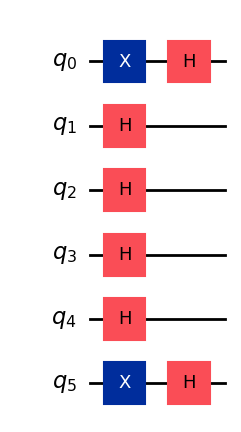

In [ ]:
# Circuit for the Superposition Joker applied on 9 of Clubs

# 6-bit binary representation of 9 of Clubs = 8 = 100001
original_bits = [1, 0, 0, 0, 0, 1]

# Create 6-qubit circuit
qc = QuantumCircuit(6, name="Oracle Init + Superposition")

# Step 1: Flip bits where bit == 1 (simulate original card encoding)
for i, bit in enumerate(original_bits):
    if bit == 1:
        qc.x(i)

# Step 2: Apply Hadamard to each qubit to enter superposition
for i in range(6):
    qc.h(i)

# Draw the circuit
qc.draw('mpl')


##### 📝 Code: class SuperpositionJoker(JokerCard)

In [ ]:
class SuperpositionJoker(JokerCard):

  def __init__(self, debug=False):
    super().__init__(name="Superposition Joker", display_name="Superposition Joker")
    self.debug = debug

  def apply(self, player, card_index):
    # Validate that the selected index is within the player's hand
    if card_index >= len(player.hand):
      print(f"Invalid card index: {card_index}")
      return None

    # Get the original card and its binary bitstring representation
    original_card = player.hand[card_index]
    original_bits = player.get_original_bits(original_card)


    # Start building the OpenQASM program
    qasm_program = """
    OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[6];
    creg c[6];

    """

    # Step 1: Flip all qubits where the original bit was 1
    # This prepares the qubit to be in the |1⟩ state before applying H
    for i in range(6):
      if original_bits[i] == 1:
          qasm_program += f"x q[{i}];\n"

    # Step 2: Apply Hadamard gates to all 6 qubits
    # This creates a uniform superposition across all possible 6-bit values
    for i in range(6):
        qasm_program += f"h q[{i}];\n"

    # Create a new quantum card with this superposition state
    quantum_card = QuantumCard(quantum_state="superposition",display_name = "Superposition",qasm_program=qasm_program,measured=False,original_card=original_card)

    # Replace the original card in the player's hand
    player.hand[card_index] = quantum_card

    print(f"Applied Superposition Joker to card {card_index+1}")
    print("This card is now in quantum superposition - it exists as all possible cards at once!")

    if self.debug:
      visualise_quantum_operation(original_card, original_bits, qasm_program)

    return quantum_card.get_dict()

##### ⚡️ Superposition Joker, but on Classiq

```python
from classiq import qfunc, Output, QBit, QNum, allocate, hadamard_transform, create_model, synthesize, show

class ClasiqJoker(JokerCard):
    def __init__(self, debug=False):
        super().__init__(name="Clasiq Joker", display_name="Clasiq Joker")
        self.debug = debug

    def apply(self, player, card_index):
        if card_index >= len(player.hand):
            print(f"Invalid card index: {card_index}")
            return None

        original_card = player.hand[card_index]

        @qfunc
        def main(x: Output[QNum]):
            allocate(6, x)
            hadamard_transform(x)

        qmod = create_model(main)
        qprog = synthesize(qmod)

        classiq_qasm = qprog.qasm # take full advantage of it

        lines = classiq_qasm.split('\n')

        gate_lines = []
        gate_call_lines = []
        in_gate_def = False

        for line in lines:
            if line.startswith('gate'):
                in_gate_def = True
                gate_lines.append(line)
            elif in_gate_def and line.strip() == '}':
                gate_lines.append(line)
                in_gate_def = False
            elif in_gate_def:
                gate_lines.append(line)
            elif 'main__hadamard_transform' in line and not in_gate_def:
                gate_call_lines.append(line)

        qasm_program = """OPENQASM 2.0;
        include "qelib1.inc";
        qreg q[6];
        creg c[6];
        """

        qasm_program += '\n'.join(gate_lines) + '\n'
        qasm_program += '\n'.join(gate_call_lines) + '\n'


        if self.debug:
            show(qprog)

        quantum_card = QuantumCard(
            quantum_state="clasiq",
            display_name="Clasiq",
            qasm_program=qasm_program,
            measured=False,
            original_card=original_card
        )

        player.hand[card_index] = quantum_card
        print(f"✅ Real Classiq Joker applied to card {card_index + 1}")
        return quantum_card.get_dict()
```

### 🔗 Entanglement Joker



The **Entanglement Joker** is based on quantum entanglement — a phenomenon where two qubits become linked, such that the state of one instantly influences the other.

#### 🔬 Under the Hood: Entanglement Joker

A single qubit is represented as:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

where $( \alpha, \beta \in \mathbb{C} )$, and normalization holds:

$$
\|\psi\|^2 = |\alpha|^2 + |\beta|^2 = 1
$$

Two qubits form a combined state via the tensor product:

$$
|\psi_{12}\rangle = |\psi_1\rangle \otimes |\psi_2\rangle = |\psi_1 \psi_2\rangle
$$

<br/>

A general 2-qubit state:

$$
|\Psi\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle
$$

is **entangled** if it cannot be separated into individual qubit states.

<br/>

#### 🛠 How the Joker Works

1. The original 6-bit card is encoded by flipping any 1s using `X` gates.
2. A random **pair of qubits** is selected to entangle (e.g., `(2, 4)`).
3. The following gates are applied:

$$
H q_a \quad\rightarrow\quad \text{Hadamard gate on first qubit}
$$

$$
\text{CNOT}(q_a, q_b) \quad\rightarrow\quad \text{Entangles first with second}
$$

This creates a Bell-like state:

$$
|q_a q_b\rangle
\xrightarrow{H \text{ on } q_a}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |q_b\rangle
\xrightarrow{\text{CNOT}}
\frac{1}{\sqrt{2}}(|0q_b\rangle + |1\bar{q}_b\rangle)
$$

<br/>

#### 🎲 Strategy

- If you have two hearts like `4 of Hearts` and `3 of Hearts`, their suit bits may be something like `[00..]`.
- Entangling those suit bits can increase the chance of drawing more hearts — useful for flushes or straight flushes.
- Similarly, entangling value bits can improve chances for a **3-of-a-kind** or **full house**.

<br/>

#### 📌 Example

You apply a `(4, 3)` Entanglement Joker to a **King of Spades**.  
During collapse, the qubit entanglement causes the card to resolve as **4 of Hearts** — potentially helping form a stronger hand!

##### e.g. Circuit for the Entanglement Joker on King of Spades

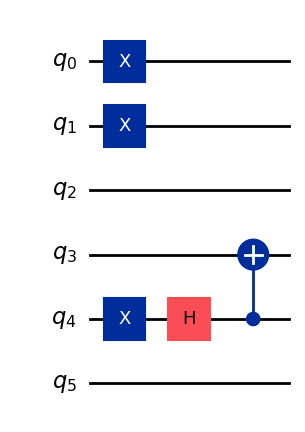

In [ ]:
# Circuit for the Entanglement Joker

# Example: Original card is King of Spades
# From your binary mapping, get its 6-bit index first
# King of Spades = suit_index=3, value_index=11 → 3*13+11 = 50 → '110010'
original_bits = [1, 1, 0, 0, 1, 0]

# Entangled pair example (4, 3)
entangled_pair = (4, 3)

# Build the circuit
qc = QuantumCircuit(6, name="Entanglement Joker")

# Encode original card into the qubits
for i, bit in enumerate(original_bits):
    if bit == 1:
        qc.x(i)

# Apply entanglement
qa, qb = entangled_pair
qc.h(qa)           # Hadamard on control
qc.cx(qa, qb)      # CNOT to entangle with target

# Draw the circuit
qc.draw('mpl')

##### 📝 Code: class EntanglementJoker(JokerCard):

In [ ]:
class EntanglementJoker(JokerCard):

  def __init__(self, debug=False):
    display_name = "Entanglement Joker"
    super().__init__(name="Entanglement Joker", display_name=display_name)
    self.debug = debug
    self.pair = self.set_entangled_pair()
    self.display_name = f"{display_name} {self.pair}"

  def set_entangled_pair(self):

    # pick and remove random value
    vals = set(range(0,5))
    pair0 = random.choice(list(vals))
    vals.remove(pair0)
    pair1 = random.choice(list(vals))
    pair = (pair0, pair1)
    return pair

  def apply(self, player, card_index):
    """entangles two cards if choice"""
    if card_index >= len(player.hand):
      print(f"Invalid card index: {card_index}")
      return None

    original_card = player.hand[card_index]

    original_bits = player.get_original_bits(original_card)

    qasm_program = """
    OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[6];
    creg c[6];
    """

    # encode original bits here
    for i in range(6):
        if original_bits[i] == 1:
            qasm_program += f"x q[{i}];\n"


    # create entanglement
    entangled_pairs = self.pair
    if entangled_pairs:
        qasm_program += f"h q[{entangled_pairs[0]}];\n"
        qasm_program += f"cx q[{entangled_pairs[0]}], q[{entangled_pairs[1]}];\n"


    entangled_card = QuantumCard(quantum_state="entangled", display_name="Entangled",qasm_program=qasm_program,measured=False,original_card=original_card)

    player.hand[card_index] = entangled_card

    print("Entanglement Joker applied! The two bits within the card are now entangled.")

    if self.debug:
      visualise_quantum_operation(original_card, original_bits, qasm_program)

    return entangled_card.get_dict()

---
### 🔮 Oracle Joker

The **Oracle Joker** is inspired by the **Deutsch-Jozsa algorithm**, which determines whether a function  
$( f: \{0,1\}^n \to \{0,1\} )$ is **constant** or **balanced** using just **one** quantum query.

<br/>

#### 🔬 Under the Hood: Oracle Joker

#### ✨ Quantum Setup

We begin with 6 data qubits and 1 ancilla qubit. The initial state is:

$$
|\psi_0\rangle = |0\rangle^{\otimes 6} \otimes |1\rangle
$$

We apply Hadamard gates to all qubits:

$$
H^{\otimes 7} |\psi_0\rangle = \frac{1}{\sqrt{2^7}} \sum_{x=0}^{63} |x\rangle (|0\rangle - |1\rangle)
$$

<br/>

#### ⚙️ Circuit Description

Let the selected card's binary representation be $( x = x_0x_1x_2x_3x_4x_5 )$.

##### Step 1: Encode the Card

We apply $( X )$ gates to the qubits where $( x_i = 1 )$:

$$
|x\rangle = \prod_{i=0}^{5} X^{x_i}(q_i) \, |0\rangle^{\otimes 6}
$$

##### Step 2: Oracle Construction

Let $( f(x) )$ be a balanced function implemented via controlled-NOT gates:

$$
U_f: |x\rangle|y\rangle \mapsto |x\rangle|y \oplus f(x)\rangle
$$

The Oracle Joker defines:

- $( c_1 )$ = index of first bit in `x` with value 1  
- $( c_2 = (c_1 + 3) \bmod 6 )$

Then the oracle gates are:

$$
\text{CX}(q_{c_1}, q_6),\quad \text{CX}(q_{c_2}, q_6)
$$

##### Step 3: Final Interference

Apply Hadamard gates again to data qubits:

$$
H^{\otimes 6} \left( U_f \cdot H^{\otimes 6} |x\rangle \right)
$$

Interference will amplify or cancel amplitudes based on the oracle, leading to a deterministic outcome when measured.


Reference: <br/>
  Nielsen, M. A., & Chuang, I. L. (2010). *Quantum computation and quantum information* (10th anniversary ed.). Cambridge University Press.



<br/>

#### 🧠 Strategic Use

- Use on **low-value cards** to trigger a transformation.
- Leverages deterministic quantum interference.
- Collapses cards influenced by their bitwise structure and oracle entanglement.

<br/>

### 🧪 Example

Card: **9 of Clubs**  
Binary: `100001` → Qubits 0 and 5 are flipped.

Oracle Joker chooses:
- $( c_1 = 0 )$
- $( c_2 = 3 )$

So:

$$
\text{CX}(q_0, q_6),\quad \text{CX}(q_3, q_6)
$$

The resulting circuit is a Deutsch-Jozsa interference setup which deterministically transforms the card.


##### e.g. Circuit for the Oracle Joker on 9 of Clubs

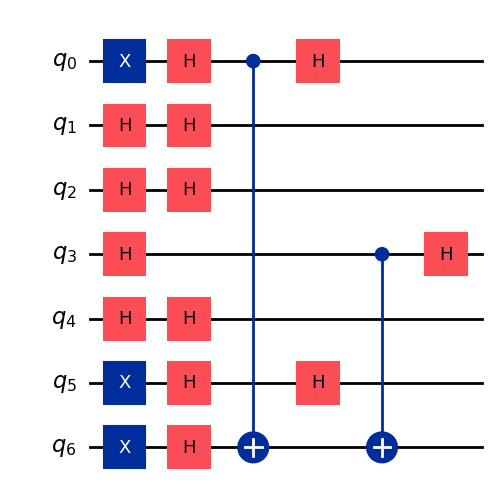

In [ ]:
# Circuit for the Oracle Joker on 9 of Clubs

# "9 of Clubs" → binary = 100001 → original_bits
original_bits = [1, 0, 0, 0, 0, 1]

# Oracle control logic
control_qubit = original_bits.index(1) if 1 in original_bits else 0
second_control = (control_qubit + 3) % 6

# Create circuit with 6 data qubits + 1 ancilla
qc = QuantumCircuit(7, name="Oracle Joker (Deutsch-Jozsa)")

# Step 1: Prepare ancilla in |-⟩ state
qc.x(6)
qc.h(6)

# Step 2: Encode original card bits
for i, bit in enumerate(original_bits):
    if bit == 1:
        qc.x(i)

# Step 3: Apply Hadamards to data qubits
for i in range(6):
    qc.h(i)

# Step 4: Balanced oracle (2 CX gates to ancilla)
qc.cx(control_qubit, 6)
qc.cx(second_control, 6)

# Step 5: Final Hadamards to data qubits
for i in range(6):
    qc.h(i)

# Display the circuit
qc.draw('mpl')


##### 📝 Code: class OracleJoker(JokerCard)

In [ ]:
class OracleJoker(JokerCard):
    def __init__(self, debug=False, oracle_type="balanced"):
        super().__init__(name="Oracle Joker", display_name=f"Oracle Joker ({oracle_type})")
        self.debug = debug
        self.oracle_type = oracle_type

    def apply(self, player, card_index):
        if card_index >= len(player.hand):
            print(f"Invalid card index: {card_index}")
            return None

        original_card = player.hand[card_index]
        original_bits = player.get_original_bits(original_card)

        # Create QASM program for Deutsch-Jozsa algorithm
        qasm_program = """
        OPENQASM 2.0;
        include "qelib1.inc";
        qreg q[7];
        creg c[6];

        x q[6];
        h q[6];
        """

        for i in range(6):
            if original_bits[i] == 1:
                qasm_program += f"x q[{i}];\n"

        for i in range(6):
            qasm_program += f"h q[{i}];\n"

        if self.oracle_type == "balanced":

            control_qubit = original_bits.index(1) if 1 in original_bits else 0
            qasm_program += f"cx q[{control_qubit}], q[6];\n"

            # Add a second control for more variability
            second_control = (control_qubit + 3) % 6
            qasm_program += f"cx q[{second_control}], q[6];\n"

        # Apply Hadamard gates again
        for i in range(6):
            qasm_program += f"h q[{i}];\n"

        # Create quantum card with the Deutsch-Jozsa circuit
        quantum_card = QuantumCard(
            quantum_state="deutsch-jozsa",
            display_name=f"Oracle ({self.oracle_type})",
            qasm_program=qasm_program,
            measured=False,
            original_card=original_card
        )

        player.hand[card_index] = quantum_card

        print(f"Applied Oracle Joker ({self.oracle_type}) to card {card_index + 1}.")

        if self.debug:
            visualise_quantum_operation(original_card, original_bits, qasm_program)

        return quantum_card.get_dict()

---

### ⏲️ Hamiltonian Joker


The **Hamiltonian Joker** simulates the evolution of a quantum state under a time-dependent Hamiltonian, inspired by the Schrödinger equation in quantum mechanics.

<br/>

#### 🔬 Under the Hood: Hamiltonian Joker

#### 💡 Core Idea

The time evolution of a quantum state is given by:

$$
|\psi(t)\rangle = e^{-i\hat{H}t} |\psi(0)\rangle
$$

where:
- $( \hat{H} )$ is the Hamiltonian (energy operator),
- $( t )$ is time,
- $( |\psi(0)\rangle )$ is the initial quantum state.

This joker evolves the card’s state using a **2-qubit interaction Hamiltonian**, expressed as:

$$
\hat{H} = a \cdot X \otimes Z + b \cdot I \otimes Z
$$

with constants:
- $( a = 0.7 )$,
- $( b = 0.1 )$,
- $( t = 1.4 )$.

<br/>

#### ⚙️ Implementation

Each pair of bits in the 6-bit card state is evolved as follows:

1. Apply Hadamard gates:
   $$
   H^{\otimes n} |0\rangle^{\otimes n}
   $$
   to place qubits in superposition.

2. For every adjacent qubit pair $((q_i, q_{i+1}))$, apply:
   - Hadamard on $( q_i )$,
   - CNOT $( q_i \rightarrow q_{i+1} )$,
   - $( R_z(2a t) )$ on $( q_{i+1} )$,
   - CNOT $( q_i \rightarrow q_{i+1} )$,
   - Hadamard on $( q_i )$,
   - $( R_z(2b t) )$ on $( q_{i+1} )$

These steps approximate the unitary $( e^{-i\hat{H}t} )$ using gate-based simulation.

<br/>

#### 🎴 Strategic Use

Use the **Hamiltonian Joker** when:
- You want to induce complex interference patterns across pairs of bits.
- You're aiming to disrupt current card states in a structured yet probabilistic way.
- You want to introduce non-classical randomness that is dependent on pairwise qubit interactions.

This joker is ideal when targeting **nonlinear transformations** across the card’s quantum representation to increase diversity of outcome, especially when trying to break stuck low-probability states.

<br>

> ⚠️ **Note:** The Hamiltonian Joker is non-measurement-based; the quantum state continues to evolve until collapsed by another operation or measurement.


##### e.g. Circuit for the Oracle Joker on King of Spades

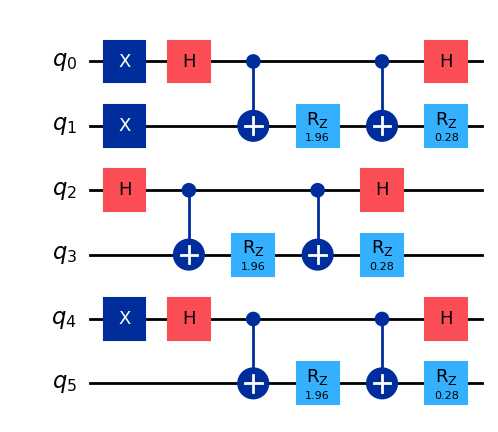

In [ ]:
# Circuit for the Oracle Joker on King of Spades
# Define parameters
t = 1.4
a = 0.7
b = 0.1

# Example card: King of Spades
original_bits = [1, 1, 0, 0, 1, 0]

# Create quantum circuit
qc = QuantumCircuit(6)

# Encode original card
for i, bit in enumerate(original_bits):
    if bit == 1:
        qc.x(i)

# Apply Hamiltonian evolution (entangled evolution with RZ rotations)
for i in range(0, 6, 2):
    qc.h(i)
    qc.cx(i, i+1)
    qc.rz(2 * a * t, i+1)
    qc.cx(i, i+1)
    qc.h(i)
    qc.rz(2 * b * t, i+1)

# Draw the circuit
qc.draw("mpl")


##### 📝 Code: class HamiltonianJoker(JokerCard)

In [ ]:
class HamiltonianJoker(JokerCard):
    def __init__(self, debug=False):
        super().__init__(name="Hamiltonian Joker", display_name="Hamiltonian Joker")
        self.debug = debug

    def apply(self, player, card_index):
      # Ensure the selected card index is valid
        if card_index >= len(player.hand):
            print(f"Invalid card index: {card_index}")
            return None

        original_card = player.hand[card_index]
        original_bits = player.get_original_bits(original_card)

        # Parameters for the Hamiltonian evolution
        t = 1.4
        a = 0.7
        b = 0.1

        qasm_program = """
        OPENQASM 2.0;
        include "qelib1.inc";
        qreg q[6];
        creg c[6];
        """

        # Step 1: Initialize the qubits based on the original classical card bits
        for i, bit in enumerate(original_bits):
            if bit == 1:
                qasm_program += f"x q[{i}];\n"

        # Step 2: Apply Hamiltonian evolution (pairwise interactions)
        # For every consecutive pair of qubits (0-1, 2-3, 4-5):
        for i in range(0, len(original_bits), 2):
            if i + 1 < len(original_bits):  # was stuffing up going out of bounds
                # Simulate evolution under H = aX⊗Z + bI⊗Z
                # This block applies entangling logic followed by Z-axis phase rotations
                qasm_program += f"""
                // Place control in superposition
                h q[{i}];

                // Create entanglement
                cx q[{i}], q[{i+1}];

                // Apply Z-rotation (interaction term)
                rz({2*a*t}) q[{i+1}];

                // Uncompute entanglement
                cx q[{i}], q[{i+1}];

                // Undo superposition
                h q[{i}];

                // Apply bias Z-rotation (field term)
                rz({2*b*t}) q[{i+1}];
                """

        # Step 3: Create a new quantum card from the transformed state
        quantum_card = QuantumCard(
            quantum_state="hamiltonian",
            display_name="Hamiltonian",
            qasm_program=qasm_program,
            measured=False,
            original_card=original_card
        )

        # Replace the original card in the player's hand
        player.hand[card_index] = quantum_card

        print(f"Applied Hamiltonian Joker to card {card_index+1}")
        print(f"Hamiltonian effect")

        if self.debug:
            visualise_quantum_operation(original_card, original_bits, qasm_program)

        return quantum_card.get_dict()

### 🧮 Arithmetic Joker

The **(Quantum) Arithmetic Joker** performs a quantum **half-adder** operation on a card’s first two qubits. It deterministically computes the **sum** and **carry**, then applies quantum randomness to the final two qubits via superposition.

This joker is ideal when you want to combine classical logic with quantum unpredictability.

<br/>

#### 🔬 Under the Hood: Arithmetic Joker

#### 🧬 How the Joker Works

Let the 6-bit card be represented by the bitstring:

$$
(b_0, b_1, b_2, b_3, b_4, b_5)
$$

These bits are mapped to qubits:

$$
(q_0, q_1, q_2, q_3, q_4, q_5)
$$

##### 1. **Initialization Phase**
- Each qubit $( q_i )$ is initialized to $( |b_i\rangle )$.
- Qubits $( q_2 )$ and $( q_3 )$ are **reset to** $( |0\rangle )$, ready to store the carry and sum.

#### 2. **Half-Adder Logic Phase**

- **Carry** is calculated with a Toffoli (CCX) gate:
  $$
  q_2 \leftarrow q_0 \land q_1
  $$

- **Sum** is calculated using two CNOT operations:
  $$
  q_3 \leftarrow q_0 \oplus q_1
  $$

This mimics the classical half-adder:
- Carry $( = q_0 \cdot q_1 )$
- Sum $( = q_0 \oplus q_1 )$

#### 3. **Superposition Phase**

Hadamard gates are applied to the last two qubits:

$$
H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}, \quad
H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}
$$

Thus,

$$
q_4, q_5 \rightarrow \text{Equal superposition states}
$$

This introduces quantum randomness into the final two bits.

<br/>

#### 🧠 Strategy

- Use this joker to **transform deterministic bits** (via addition) and add **quantum uncertainty** to the card's remaining bits.
- Can help generate more diverse combinations, nudging toward:
  - **Pairs**
  - **Three-of-a-Kind**
  - **Full Houses**
- The random superposition in $( q_4 )$ and $( q_5 )$ adds variability without completely destroying structure.

<br>

#### 📌 Example

Suppose you apply the Arithmetic Joker to a card with:

$$
(b_0, b_1) = (1, 1)
$$

- **Carry:** $( q_2 = 1 \cdot 1 = 1 )$
- **Sum:** $( q_3 = 1 \oplus 1 = 0 )$
- **Superposition:** $( q_4, q_5 \rightarrow \frac{|0\rangle + |1\rangle}{\sqrt{2}} )$

This could result in a card with partially fixed structure and partially probabilistic behavior — ideal for forming powerful hands while retaining flexibility.


##### e.g. Circuit for the Arithmetic Joker

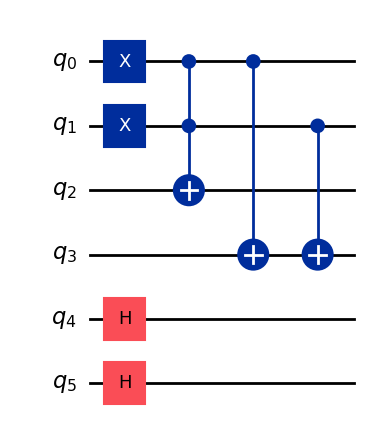

In [ ]:
# Circuit for the Arithmetic Joker
# Create a 6-qubit quantum circuit
qc = QuantumCircuit(6, name="Quantum Arithmetic Joker")

# --- Initialization (example with b0 = 1, b1 = 1) ---
qc.x(0)  # Set q0 = |1⟩
qc.x(1)  # Set q1 = |1⟩

# q2 and q3 assumed to be |0⟩ already (carry and sum)

# --- Half-Adder Logic ---
qc.ccx(0, 1, 2)  # Carry: q2 = q0 AND q1
qc.cx(0, 3)      # Sum: q3 = q0 XOR q1 (step 1)
qc.cx(1, 3)      # Sum: q3 = q3 XOR q1 (step 2)

# --- Superposition Phase ---
qc.h(4)          # Hadamard on q4
qc.h(5)          # Hadamard on q5

# Draw the circuit
qc.draw('mpl')


##### 📝 Code: class QuantumArithmeticJoker(JokerCard)

In [ ]:
class QuantumArithmeticJoker(JokerCard):

  def __init__(self, debug=False):
    super().__init__(name="Arithmetic Joker", display_name="Arithmetic Joker")
    self.debug = debug

  def apply(self, player, card_index):
    if card_index >= len(player.hand):
      print(f"Invalid card index: {card_index}")
      return None

    original_card = player.hand[card_index]
    original_bits = player.get_original_bits(original_card)

    qasm_program = """OPENQASM 2.0;
      include "qelib1.inc";
      qreg q[6];
      creg c[6];
      """

    # Initialize q[0]...q[5] from original_bits
    for i in range(6):
        if original_bits[i] == 1:
            qasm_program += f"x q[{i}];\n"

    # Prepare q[2] (for carry) and q[3] (for sum) to be zero for output.
    if original_bits[2] == 1:
        qasm_program += f"x q[2];\n"
    if original_bits[3] == 1:
        qasm_program += f"x q[3];\n"

    # Half-adder logic:
    qasm_program += f"ccx q[0], q[1], q[2];\n"
    qasm_program += f"cx q[0], q[3];\n"
    qasm_program += f"cx q[1], q[3];\n"

    # Put original q[4] and q[5] into superposition
    qasm_program += f"h q[4];\n"
    qasm_program += f"h q[5];\n"

    quantum_card = QuantumCard(quantum_state="arithmetic",
                               display_name="Quantum Arithmetic",
                               qasm_program=qasm_program,
                               measured=False,
                               original_card=original_card)

    player.hand[card_index] = quantum_card

    print(f"Applied Quantum Arithmetic Joker to card {card_index+1}.")
    print("This card's bits 2 & 3 will become carry & sum of original bits 0 & 1. Bits 4 & 5 are in superposition.")

    if self.debug:
      print(f"Original Card: {original_card.display_name}") # Added for clarity
      print(f"Original Card (as bits): {original_bits}") # Added for clarity
      print(f"QASM Program:\n{qasm_program}") # Print with a leading newline for readability
      visualise_quantum_operation(original_card, original_bits, qasm_program)

    return quantum_card.get_dict()

### 🔍 Grover’s Joker

The **Grover's Joker** applies **Grover's quantum search algorithm** to a selected card. Grover's algorithm is a quantum algorithm that amplifies the probability of a "target state" — in this case, the card’s original bitstring — allowing it to emerge more frequently during measurement.

<br/>

#### 🔬 Under the Hood: Grover's Joker

#### 🧠 What It Does

- Creates a **quantum joker card**.
- Implements **Grover’s search** using Oracle + Diffusion.
- Applies the optimal number of iterations based on:
  $$
  \left\lfloor \frac{\pi}{4} \sqrt{2^n} \right\rfloor
  $$

<br/>

#### 🌀 Quantum Setup

##### Step 1: Uniform Superposition

All $( n )$ qubits are initialized to $( |0\rangle )$, then transformed into an equal superposition:

$$
|\psi_0\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle
$$

Where $( N = 2^n )$.

<br/>

##### Step 2: Grover Iterations

Let the original bitstring of the selected card be the **target state** $( |x_0\rangle )$. The algorithm applies:

**1. Oracle:**  
Marks the target state $( |x_0\rangle )$ by flipping its sign:

$$
O|x\rangle = \begin{cases}
  -|x\rangle, & \text{if } x = x_0 \\
  |x\rangle, & \text{otherwise}
\end{cases}
$$

**2. Diffusion Operator:**  
Amplifies the probability amplitude of the target state:

$$
D = 2|\psi_0\rangle \langle \psi_0| - I
$$

**3. Grover Operator:**  
The combined operator applied per iteration:

$$
G = D \cdot O = \left(2|\psi_0\rangle \langle \psi_0| - I \right) \cdot O
$$

This is repeated for:

$$
\left\lfloor \frac{\pi}{4} \sqrt{2^n} \right\rfloor
$$

iterations.

<br/>

#### 🧾 Circuit Logic Breakdown

1. **Initial Hadamards**:
    - Apply $( H )$ gates to all qubits to create uniform superposition.

2. **Oracle (Inversion about target)**:
    - Flip all qubits that are 0 in the target state using $( X )$ gates.
    - Apply **multi-controlled-Z** gate using `MCXGate` or `Z` if single qubit.
    - Undo the previous $( X )$ gates to restore basis.

3. **Diffusion**:
    - Apply $( H )$ and $( X )$ to all qubits.
    - Apply another **multi-controlled-Z** gate.
    - Undo $( X )$ and $( H )$ gates.

4. **Measurement**:
    - All qubits are measured after iterations.

<br/>

#### 🃏 Effect on Card

The final measured card is more likely to be **the original value** — this enhances the chance of reproducing a strong card (e.g. if it was part of a high-value hand).

The result is wrapped into a new `QuantumCard` object with:

- `quantum_state="grover"`
- `display_name="Grover's Search"`
- Attached QASM program

<br/>

#### 🧪 Example

Let’s say the original card has bits:  
`original_bits = (1, 0, 1, 1, 0, 0)`

- Oracle inverts this target state’s sign.
- Diffusion operator boosts its amplitude.
- After ~4 iterations (for $( n = 6 )$), the target state becomes dominant.
- Upon measurement, the result will very likely collapse to the original bits — boosting scoring consistency!

<br/>

>#### 📌 Notes
>- The Oracle uses an **MCX gate** to simulate multi-controlled phase flips.
- The number of iterations is optimal for **a single target state**.
- The Joker boosts the odds of recovering powerful cards — helpful in the late game!

<br/>


##### e.g. Circuit for the Grover's Joker

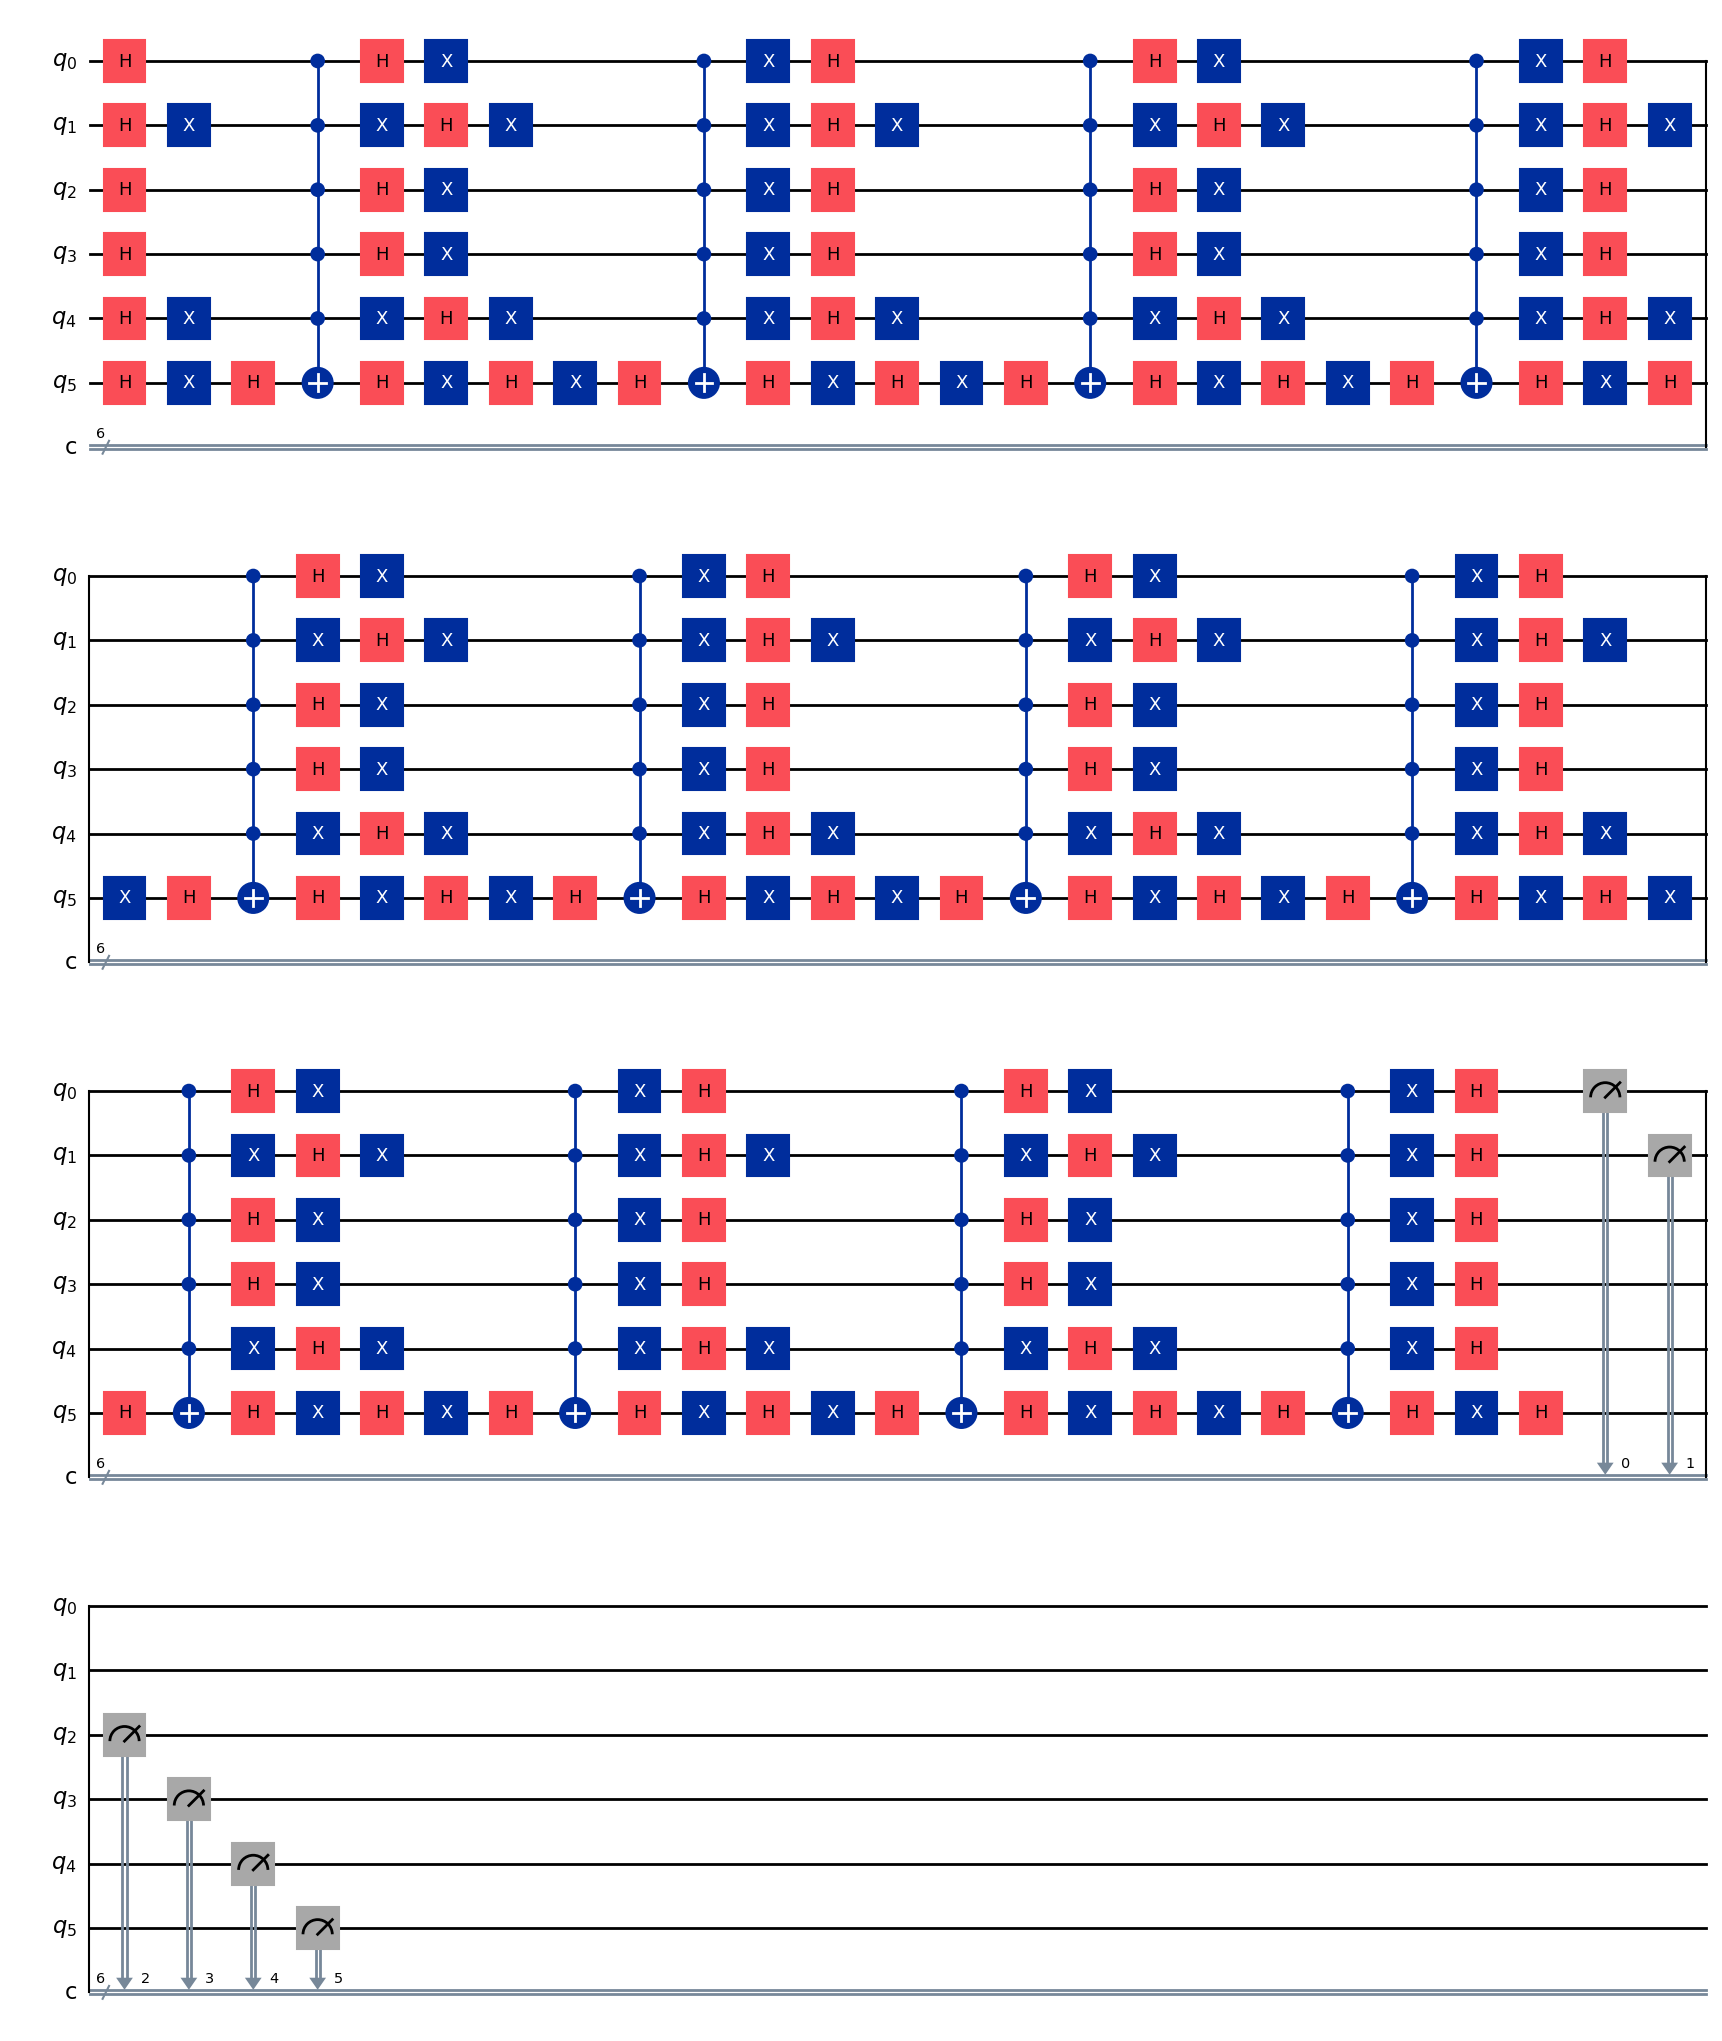

In [ ]:
# Circuit for the Grover's Joker
from numpy import pi, sqrt, floor

# Define 6-bit target
target_bits = [1, 0, 1, 1, 0, 0]  # Corresponds to |101100⟩
num_qubits = len(target_bits)

# Calculate optimal Grover iterations
iterations = int(floor((pi / 4) * sqrt(2 ** num_qubits)))

# Create quantum circuit
qc = QuantumCircuit(num_qubits, num_qubits)

# Step 1: Uniform superposition
qc.h(range(num_qubits))

# Step 2: Apply Grover iterations
for _ in range(iterations):
    # --- Oracle: Mark |101100⟩ ---
    for i, bit in enumerate(target_bits):
        if bit == 0:
            qc.x(i)

    qc.h(num_qubits - 1)
    qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)
    qc.h(num_qubits - 1)

    for i, bit in enumerate(target_bits):
        if bit == 0:
            qc.x(i)

    # --- Diffusion operator ---
    qc.h(range(num_qubits))
    qc.x(range(num_qubits))

    qc.h(num_qubits - 1)
    qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)
    qc.h(num_qubits - 1)

    qc.x(range(num_qubits))
    qc.h(range(num_qubits))

# Final measurement
qc.measure(range(num_qubits), range(num_qubits))

# Draw the circuit
qc.draw("mpl")


##### 📝 Code: class GroversJoker(JokerCard)

In [ ]:
from qiskit.circuit.library import MCXGate
from qiskit import QuantumCircuit, qasm2, transpile
import numpy as np

class GroversJoker(JokerCard):
    def __init__(self, debug=False):
        super().__init__(name="Grover Joker", display_name="Grover Joker")
        self.debug = debug

    def apply(self, player, card_index):
        print("Applying Grover")
        # Check card index is valid
        if card_index >= len(player.hand):
            print(f"Invalid card index: {card_index}")
            return None

        original_card = player.hand[card_index]
        original_bits = player.get_original_bits(original_card)
        num_qubits = len(original_bits)

        # Calculate optimal number of Grover iterations
        iterations = int(np.floor((np.pi / 4) * np.sqrt(2**num_qubits)))

         # Create circuit with same number of qubits and classical bits
        circuit = QuantumCircuit(num_qubits, num_qubits)

        # Step 1: Apply Hadamard gates to initialize superposition
        circuit.h(range(num_qubits))

        # Step 2: Apply Grover iterations
        for _ in range(iterations):
          # --- Oracle (marks the target state by phase flip) ---
            x_indices = [i for i, bit in enumerate(original_bits) if bit == 0]
            # Flip bits that are 0 in target to prepare for MCX
            circuit.x(x_indices)

            if num_qubits > 1:
               # Apply multi-controlled Z using H-MCX-H trick
                circuit.h(num_qubits-1)
                mcx = MCXGate(num_qubits - 1)
                circuit.append(mcx, list(range(num_qubits)))
                circuit.h(num_qubits-1)
            else:
              # For 1 qubit, Z is enough
                circuit.z(0)

            circuit.x(x_indices) # Unflip the qubits

            # --- Diffusion operator (inversion about average) ---
            circuit.h(range(num_qubits))
            circuit.x(range(num_qubits))

            if num_qubits > 1:
                circuit.h(num_qubits-1)
                mcx_diff = MCXGate(num_qubits - 1)
                circuit.append(mcx_diff, list(range(num_qubits)))
                circuit.h(num_qubits-1)
            else:
                circuit.z(0)

            circuit.x(range(num_qubits))
            circuit.h(range(num_qubits))

        # # Step 3: Measure all qubits
        circuit.measure(range(num_qubits), range(num_qubits))

        # Transpile to clean circuit with standard gates only
        # circuit = transpile(circuit, basis_gates=['u3', 'cx'], optimization_level=3)

        # Convert to QASM
        qasm_program = qasm2.dumps(circuit)

        # Create and assign new quantum card
        quantum_card = QuantumCard(
            quantum_state="grover",
            display_name="Grover's Search",
            qasm_program=qasm_program,
            measured=False,
            original_card=original_card
        )

        player.hand[card_index] = quantum_card
        print(f"Applied Grover's Joker to card {card_index+1}")
        print("Quantum search amplification applied to enhance card value!")

        if self.debug:
            visualise_quantum_operation(original_card, original_bits, qasm_program)
            print("\nCircuit Diagram:")
            print(circuit)

        return quantum_card.get_dict()

---

> 😎 We chose to write our quantum jokers in QASM, except Grover's Joker, to get a deeper understanding of quantum computation, and we also used Qiskit to draw pretty quantum circuits. Then there is this.
<img src="https://i.programmerhumor.io/2022/02/programmerhumor-io-programming-memes-python-memes-5b4500389b41433.png" alt="meme"/>

---
### 📉 Collapsing Quantum Jokers

In quantum mechanics, the act of **measurement** forces a probabilistic quantum state to *collapse* into a single classical outcome. This is a core concept behind how our quantum cards behave.

<br/>

#### 👨‍⚖️ Born’s Rule and Measurement

A quantum state is typically represented as:

$$
|\psi\rangle = \sum_{i=0}^{2^n - 1} \alpha_i |i\rangle,
$$

where:

- $( \alpha_i \in \mathbb{C} )$ are complex amplitudes,
- $( |i\rangle )$ are computational basis states,
- $( \sum_i |\alpha_i|^2 = 1 )$ ensures normalization.

When a measurement is made, the system collapses to a classical state $( |k\rangle )$ with probability:

$$
\Pr(|k\rangle) = |\alpha_k|^2.
$$

<br/>



In [ ]:
def collapse_superposition(self, card_index):
  # Validate card index
  if card_index >= len(self.hand):
    print(f"Invalid card index: {card_index}")
    return False

  card = self.hand[card_index]

  # Ensure card is in superposition state and not yet measured
  if getattr(card, "quantum_state", None) != "superposition" or getattr(card, "measured", False):
    print("this card is not in an superposition state or has already been measured.")
    return False

  # Add measurement to the QASM program
  qasm_program = card.qasm_program + "\n"

  for i in range(6):
      qasm_program += f"measure q[{i}] -> c[{i}];\n"

  # Run quantum measurement
  measurement_results = send_to_quokka(program=qasm_program, count=1)[0]
  new_card = quantum_to_card(measurement_results)
  self.hand[card_index] = new_card

  print("Quantum superposition collapsed!\n")
  print(f"The card is now: {new_card.display_name}\n")

  if self.debug:
    print(f"QASM Program: {qasm_program}")
    print(f"Measurement Results: {measurement_results}")

  press_to_continue()

  return True

###

def collapse_entanglement(self, card_index):
  # Validate card index
  if card_index >= len(self.hand):
    print(f"Invalid card index: {card_index}")
    return False

  card = self.hand[card_index]

  # Ensure card is in superposition state and not yet measured
  if getattr(card, "quantum_state", None) != "entangled" or getattr(card, "measured", False):
    print("this card is not in an entangled state or has already been measured.")
    return False

  qasm_program = card.qasm_program + "\n"

  # Add measurement to the QASM program
  for i in range(6):
      qasm_program += f"measure q[{i}] -> c[{i}];\n"

  # Run quantum measurement
  measurement_results = send_to_quokka(program=qasm_program, count=1)[0]
  new_card = quantum_to_card(measurement_results)
  self.hand[card_index] = new_card

  print("Quantum entanglement collapsed!\n")
  print(f"The card is now: {new_card.display_name}\n")

  if self.debug:
    print(f"QASM Program: {qasm_program}")
    print(f"Measurement Results: {measurement_results}")

  press_to_continue()

  return True

###

def collapse_hamiltonian(self, card_index):
  # Validate card index
  if card_index >= len(self.hand):
    print(f"Invalid card index: {card_index}")
    return False

  card = self.hand[card_index]

  # Ensure card is in superposition state and not yet measured
  if getattr(card, "quantum_state", None) != "hamiltonian" or getattr(card, "measured", False):
    print("This card is not in hamiltonian or has already been measured.")
    return False
    raise Exception("This card is not in hamiltonian or has already been measured.")

  qasm_program = card.qasm_program + "\n"

  # Add measurement to the QASM program
  for i in range(6):
      qasm_program += f"measure q[{i}] -> c[{i}];\n"

  # Run quantum measurement
  measurement_results = send_to_quokka(program=qasm_program, count=1)[0]
  new_card = quantum_to_card(measurement_results)
  self.hand[card_index] = new_card

  print("Quantum hamitonian collapsed!\n")
  print(f"The card is now: {new_card.display_name}\n")

  if self.debug:
    print(f"QASM Program: {qasm_program}")
    print(f"Measurement Results: {measurement_results}")

  press_to_continue()

  return True

###

def collapse_deutsch_jozsa(self, card_index):
  # Validate card index
  if card_index >= len(self.hand):
    print(f"Invalid card index: {card_index}")
    return False

  card = self.hand[card_index]

  # Ensure card is in superposition state and not yet measured
  if getattr(card, "quantum_state", None) != "deutsch-jozsa" or getattr(card, "measured", False):
    print("This card is not in deutsch-jozsa state or has already been measured.")
    return False

  qasm_program = card.qasm_program + "\n"

  # Add measurement to the QASM program
  for i in range(6):
      qasm_program += f"measure q[{i}] -> c[{i}];\n"

  # Run quantum measurement
  measurement_results = send_to_quokka(program=qasm_program, count=1)[0]
  all_zeros = all(bit == 0 for bit in measurement_results)

  if all_zeros:
    print("Oracle function is constant!")
  else:
    print("Oracle function is balanced!")

  new_card = quantum_to_card(measurement_results)

  self.hand[card_index] = new_card

  print("Quantum oracle collapsed!\n")
  print(f"The card is now: {new_card.display_name}\n")

  if self.debug:
    print(f"QASM Program: {qasm_program}")
    print(f"Measurement Results: {measurement_results}")

  press_to_continue()

  return True

###

def collapse_grover(self, card_index):
  # Validate card index
  if card_index >= len(self.hand):
    print(f"Invalid card index: {card_index}")
    return False

  card = self.hand[card_index]

  # Ensure card is in superposition state and not yet measured
  if getattr(card, "quantum_state", None) != "grover" or getattr(card, "measured", False):
    print("This card is not in grover or has already been measured.")
    return False

  qasm_program = card.qasm_program + "\n"

  # Add measurement to the QASM program
  for i in range(6):
      qasm_program += f"measure q[{i}] -> c[{i}];\n"

  print(qasm_program)

  # Run quantum measurement
  measurement_results = send_to_quokka(program=qasm_program, count=1)[0]

  print('MEASUREMENTSSS')
  print(measurement_results)

  new_card = quantum_to_card(measurement_results)

  self.hand[card_index] = new_card

  print("Quantum grover collapsed!\n")
  print(f"The card is now: {new_card.display_name}\n")

  if self.debug:
    print(f"QASM Program: {qasm_program}")
    print(f"Measurement Results: {measurement_results}")

  press_to_continue()

  return True

###

def collapse_clasiq(self, card_index):
  # Validate card index
  if card_index >= len(self.hand):
    print(f"Invalid card index: {card_index}")
    return False

  card = self.hand[card_index]

  # Ensure card is in superposition state and not yet measured
  if getattr(card, "quantum_state", None) != "clasiq" or getattr(card, "measured", False):
    print("This card is not in clasiq or has already been measured.")
    return False

  qasm_program = card.qasm_program + "\n"

  # Add measurement to the QASM program
  for i in range(6):
      qasm_program += f"measure q[{i}] -> c[{i}];\n"

  print(qasm_program)

  # Run quantum measurement
  measurement_results = send_to_quokka(program=qasm_program, count=1)[0]
  new_card = quantum_to_card(measurement_results)
  self.hand[card_index] = new_card

  print("Quantum clasiq collapsed!\n")
  print(f"The card is now: {new_card.display_name}\n")

  if self.debug:
    print(f"QASM Program: {qasm_program}")
    print(f"Measurement Results: {measurement_results}")

  press_to_continue()

  return True

###

def collapse_arithmetic(self, card_index):
  # Validate card index
  if card_index >= len(self.hand):
    print(f"Invalid card index: {card_index}")
    return False

  card = self.hand[card_index]

  # Ensure card is in superposition state and not yet measured
  if getattr(card, "quantum_state", None) != "arithmetic" or getattr(card, "measured", False):
    print("This card is not in arithmetic or has already been measured.")
    return False

  qasm_program = card.qasm_program + "\n"

  # Add measurement to the QASM program
  for i in range(6):
      qasm_program += f"measure q[{i}] -> c[{i}];\n"

  # Run quantum measurement
  measurement_results = send_to_quokka(program=qasm_program, count=1)[0]
  new_card = quantum_to_card(measurement_results)
  self.hand[card_index] = new_card

  print("Quantum clasiq collapsed!\n")
  print(f"The card is now: {new_card.display_name}\n")

  if self.debug:
    print(f"QASM Program: {qasm_program}")
    print(f"Measurement Results: {measurement_results}")

  press_to_continue()

  return True

---
### 👷 Quantum UI Helpers

This allows us to debug the game while playing the game.


In [ ]:
# displays an interactive "Continue" button to pause execution in Google Colab.
def press_to_continue():

  button = widgets.Button(description='Continue',layout=widgets.Layout(width='150px', height='40px'),button_style='primary')

  output = widgets.Output()
  display(button, output)

  continue_clicked = False

  def on_button_clicked(b):
    nonlocal continue_clicked
    continue_clicked = True
    if not look_under_the_hood:
      clear_output(wait=True)

  button.on_click(on_button_clicked)

# visualises a quantum card's QASM circuit and metadata using Qiskit during gameplay.
def visualise_quantum_operation(original_card, original_bits, qasm_program):
  print(f"Original Card: {original_card.name}")
  print(f"Original Card (as bits): {original_bits}")
  print(f"QASM Program: {qasm_program}")

  try:
    circuit = qiskit.QuantumCircuit.from_qasm_str(qasm_program)

    display(circuit.draw(output='mpl'))
  except Exception as e:
    print(f"Error converting QASM to circuit: {e}")

---
# 🎭 Quantum Balatro – TL;DR Instructions

<img src="https://i.imgur.com/rZ5SLKA.png" alt="Quantum Balatro Game Cover" height="400" />

Welcome to Quantum Balatro, where Classical Balatro (aka Joker in ancient Rome) meets Quantum Jokers!

<br/>

## 🕹 How to Play

Once you hit **level 3**, the game ends. See how high you can score before then! ✨

1. Set your variables in the cell below.
2. Select **Runtime > Run all**.
3. You’ll be presented with **8 buttons**:

<br/>

## 🎮 Game Buttons

- **✅ Submit Hand**  
  Scores your current hand. Any quantum cards are **automatically measured (collapsed)** before scoring.

- **🌀 Use Superposition Joker**  
  Applies a **Hadamard transformation** to one selected card (cards 1–5), placing all bits into equal superposition.

- **🔗 Use Entanglement Joker**  
  Entangles **two specific qubits** (control and target) in a selected card. These bits will collapse together during measurement.

- **⚛️ Use Hamiltonian Joker**  
  Evolves the card’s state under a simplified **Hamiltonian operator** to simulate quantum interaction and interference.

- **🔍 Use Oracle Joker (Deutsch–Jozsa)**  
  Runs the **Deutsch–Jozsa algorithm** to determine whether a card-influenced function is constant or balanced.

- **📈 Use Grover Joker**  
  Amplifies the likelihood of re-measuring the card’s original value using **Grover’s quantum search** algorithm.

- **🧮 Use Arithmetic Joker**  
  Performs a **half-adder** operation on the first two bits and puts the last two bits into superposition for hybrid logic/randomness.

- **📉 Measure All Quantum Cards**  
  Instantly collapses any unmeasured quantum cards into classical values.

<br/>

## 🃏 Jokers

> ⚠️ **IMPORTANT:** You *cannot* apply a quantum effect (joker) to a card that is **already in a quantum state and unmeasured**. If you do this by mistake, simply click **Back** to revert your hand.

There are **6 jokers**:

1. **🌀 Superposition Joker**  
   - Transforms a card into a state that represents *all possible cards at once*.  
   - It flips the bits and then uses quantum logic to place the card into an evenly balanced, probabilistic state — the outcome isn’t determined until you measure it.

2. **🔗 Entanglement Joker**  
   - Links two specific bits in a card together so that when one collapses during measurement, the other *automatically matches*.  
   - This can help increase your chances of forming pairs, flushes, or full houses by forcing bit patterns to sync up.

3. **🔍 Oracle Joker**  
   - Runs a simplified quantum algorithm to evaluate whether your card triggers a pattern that is *balanced or consistent*.  
   - Based on this result, the card will collapse in a way that reflects the hidden structure — potentially increasing the odds of a favorable hand.

4. **⚛️ Hamiltonian Joker**  
   - Simulates quantum interaction between the bits of a card, as if the card had been evolving inside a physical quantum system.  
   - It introduces correlations and interference between bit positions, creating unique, entangled behavior that may shift the card toward stronger hand outcomes.

5. **🧮 Arithmetic Joker**  
   - Performs a simple calculation on the bits in your card — like adding two numbers together.  
   - Then, it introduces a bit of randomness by placing the remaining bits into a probabilistic state.  
   - This mix of logic and uncertainty makes it ideal for nudging weak cards into playable ones.

6. **📈 Grover Joker**  
   - Dramatically increases the chance of redrawing the **exact same card** it was originally applied to.  
   - It’s like asking the quantum system to “search” for your preferred card and boost its chances of appearing.



<br/>

## 🔍 `look_under_the_hood`

Enable `look_under_the_hood = True` to:

- View the quantum circuit for each card when a joker is applied
- See how transformations affect the qubit states visually

<br/>

## 🎯 Difficulty Settings

- **Higher difficulty** → Fewer cards and fewer jokers
- **Quantum Gambling** → Lots of jokers, few cards

<br/>

## ☝️ Tips

- Don’t waste all your jokers at once!
- If you have duplicate jokers, the **first available one** is used.

<br/>

## ♠️ Poker Hand & Rankings for the Noobs

If you're not familiar with poker, here's a quick reference:

1. **Straight Flush** – Five consecutive cards of the same suit
2. **Four of a Kind** – Four cards of the same rank
3. **Full House** – Three of a kind + a pair
4. **Flush** – Five cards of the same suit, not consecutive
5. **Straight** – Five consecutive cards (any suit)
6. **Three of a Kind** – Three cards of the same rank
7. **Two Pair** – Two separate pairs
8. **One Pair** – Two cards of the same rank
9. **High Card** – When none of the above, the highest card wins

<br/>

Good luck, and may the quantum odds be ever in your favor!


In [ ]:
difficulty_options = ["easy", "medium", "hard", "gambler", "quantum gambling"]

look_under_the_hood = False # set to true if you'd like to see whats happening underneath! this will keep ALL outputs, so you will have to scroll down but you will be able to see the circuits and programs being passed in
difficulty = difficulty_options[1] # set your difficulty of choice here

In [ ]:
#play_game(difficulty, look_under_the_hood=look_under_the_hood)
play_game(difficulty, look_under_the_hood=look_under_the_hood)

=== QUANTUM BALATRO ===
Score: 0 | Multiplier: 1.5x | Level: 1 | Difficulty: medium

🃏 YOUR HAND 🃏
═══════════════
  1. 2 of Spades | Binary: [1, 0, 0, 1, 1, 1]
  2. 5 of Diamonds | Binary: [0, 1, 0, 0, 0, 0]
  3. 2 of Hearts | Binary: [0, 0, 0, 0, 0, 0]
  4. K of Spades | Binary: [1, 1, 0, 0, 1, 0]
  5. J of Clubs | Binary: [1, 0, 0, 0, 1, 1]
  6. 3 of Spades | Binary: [1, 0, 1, 0, 0, 0]
  7. 10 of Clubs | Binary: [1, 0, 0, 0, 1, 0]

──────────────────────────────

🎭 YOUR JOKERS 🎭
═══════════════════
  1. Superposition Joker
  2. Oracle Joker (balanced)
  3. Grover Joker


Button(button_style='success', description='Submit Hand', layout=Layout(height='60px', margin='8px', width='25…

HTML(value="<p style='margin: 5px 0; font-weight: bold;'>Quantum Jokers:</p>")

HTML(value="<p style='margin: 10px 0 5px 0;'></p>")

Button(button_style='warning', description='Measure All Quantum Cards', disabled=True, layout=Layout(height='5…